<div style="text-align:center;">
  <img src="https://speedmedia.jfrog.com/08612fe1-9391-4cf3-ac1a-6dd49c36b276/https://media.jfrog.com/wp-content/uploads/2021/12/29113553/jfrog-logo-2022.svg/w_1024" width="150" height="150">
</div>

# JFrog Data Science Home Assignment


You are employed at a company, FrogAd Corp, that provides a platform for managing advertising campaigns on behalf of various businesses.

FrogAd offers three distinct product tiers: P1, P2, and P3, with P3 being the highest-tier offering, followed by P2, and then P1. We've gathered data from  who were in either the P1 or P2 tiers and examined whether they upgraded to the P3 tier or not. Our goal is to assist the Sales department in determining which customers should be their primary focus for upgrading to the P3 tier.

Your assignment involves the following objectives:

1. Conduct an analysis of customer data pertaining to P1 and P2 tiers.
2. Develop a baseline model capable of predicting which customers are inclined to upgrade their subscription to the more advanced P3 tier. Discuss which metric(s) is/are relevant for this case.
3. Suggest action items based on your findings. E.g., for your team or for business stakeholders.
4. Prepare a summary presentation showing your development to the FrogAd staff. You will present this presentation to JFrog's team and answer questions regarding it. Please submit this presnetation file as well as the Jupyter notebook ipynb file you used. 

The data available contains:
- The impressions from 4 different social media in the past 3 months
- The client's industry type
- The number of support cases were opened with us by the client
- The number of technical sessions were held by us with the client
- The number of platform users we had in the past 3 months
- The number of people working for the customer whose contact information we have
- The client's location
- The client's subscription tier
- The client's number of employees




In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


In [237]:
data = pd.read_parquet('assignment_data_(3).parquet')
data

,account_id,date,facebook_impressions_1_lag,facebook_impressions_2_lag,facebook_impressions_3_lag,linkedin_impressions_1_lag,linkedin_impressions_2_lag,linkedin_impressions_3_lag,industry_group,n_support_cases,...,instagram_impressions_1_lag,instagram_impressions_2_lag,instagram_impressions_3_lag,n_contact_people,territory,product,n_employees_range,is_sharing,is_enabled,target
0,0,2021-07-01,0,0,0,9,9,9,Software,1,...,12802,10838,7742,7,T1,P2,250 - 500,1,1,0
1,1,2022-07-01,1,2,1,3,6,3,Finance,0,...,3884,3904,3757,13,T1,P2,"1,000 - 5,000",1,1,0
2,2,2022-10-01,1,1,1,2,2,2,Manufacturing,0,...,4916,4419,3945,5,T1,P1,20 - 50,1,1,0
3,3,2019-08-01,20,20,20,6,5,5,Software,0,...,24092,23396,23228,13,T2,P1,"500 - 1,000",1,1,0
4,4,2018-03-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Business Services,0,...,<NA>,<NA>,<NA>,6,T2,P1,"1,000 - 5,000",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,4192,2022-08-01,1,1,1,0,0,0,Business Services,0,...,422,369,345,8,T2,P2,"1,000 - 5,000",1,1,0
4193,4193,2023-05-01,0,0,0,2,2,2,Software,0,...,4260,4135,4774,15,T2,P1,250 - 500,1,1,0
4194,4194,2020-12-01,2,2,2,2,2,2,Business Services,0,...,901,849,821,3,T2,P1,"500 - 1,000",1,1,0
4195,4195,2021-06-01,0,0,0,14,14,26,Finance,0,...,927,861,811,5,T2,P1,50 - 100,1,1,0


In [238]:
# filling nans
data[data.select_dtypes(include=['number']).columns] = data.select_dtypes(include=['number']).fillna(0)

for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

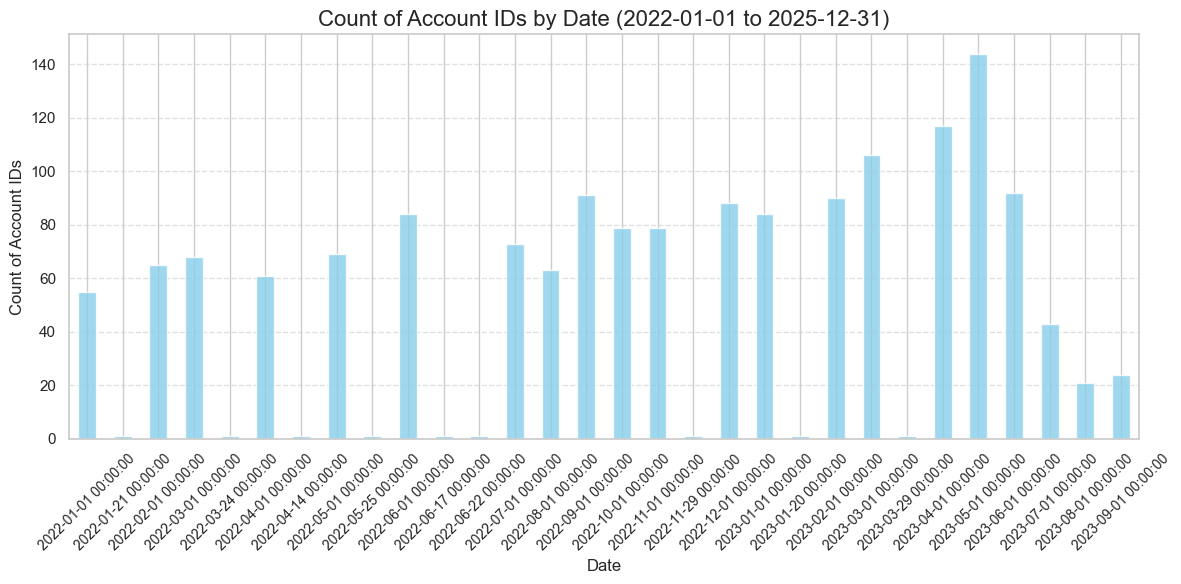

In [239]:
data['date'] = pd.to_datetime(data['date'])
start_date = '2022-01-01'
end_date = '2025-12-31'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
#filtered_data = filtered_data[filtered_data['product']=='P1']
grouped_data = filtered_data.groupby(['date'])['account_id'].count().sort_index()
#grouped_data = grouped_data[grouped_data!=1]
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title(f'Count of Account IDs by Date ({start_date} to {end_date})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count of Account IDs', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# there are dates that are not the 1st date of the month, and the count is 1 for them. maybe we should filter them out.
# also, there is trend through time with the count of account ids, so perhaps worth filter old accounts.

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


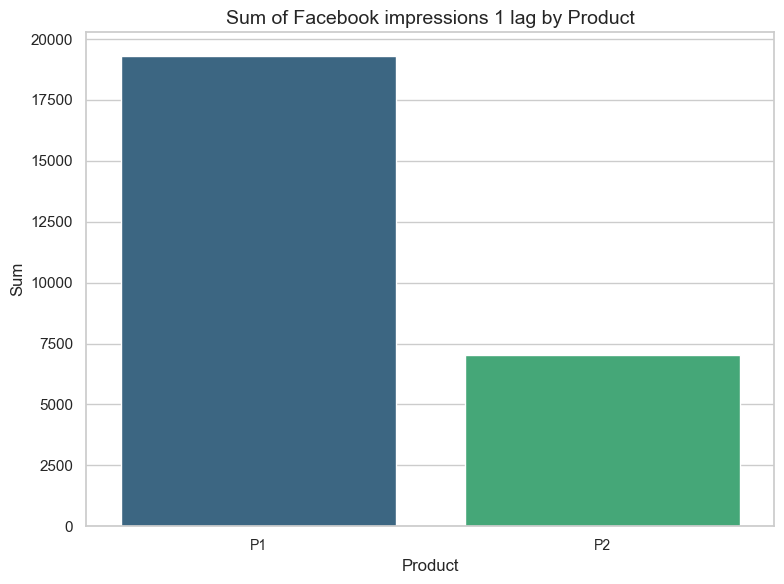



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


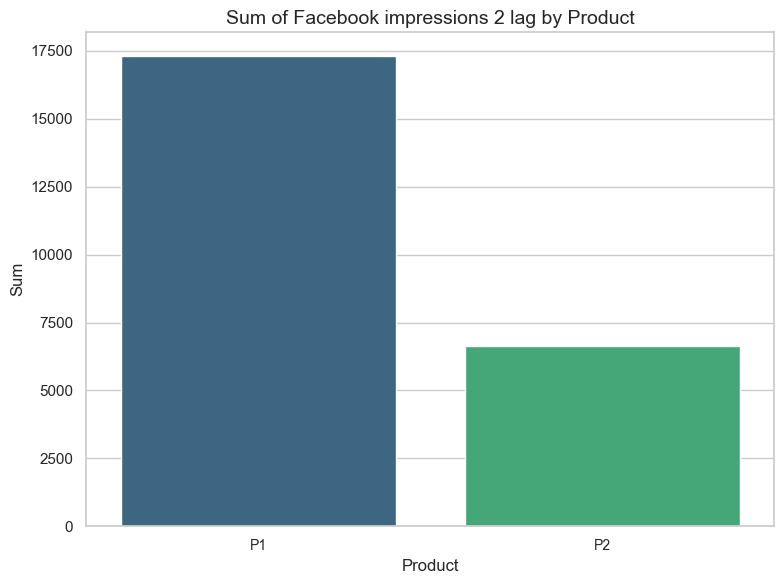



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


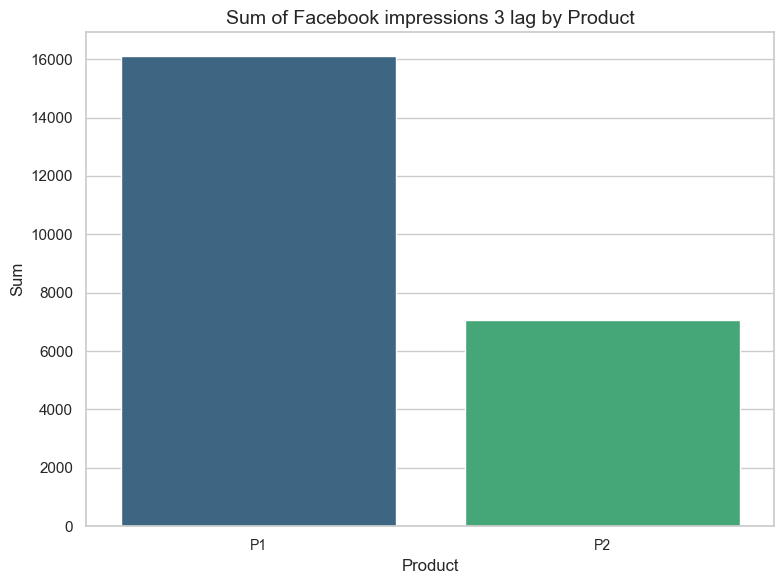



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


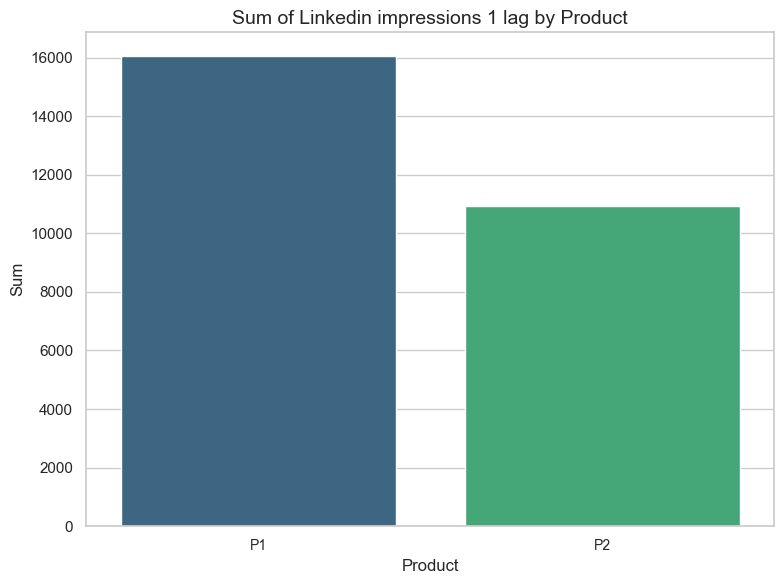



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


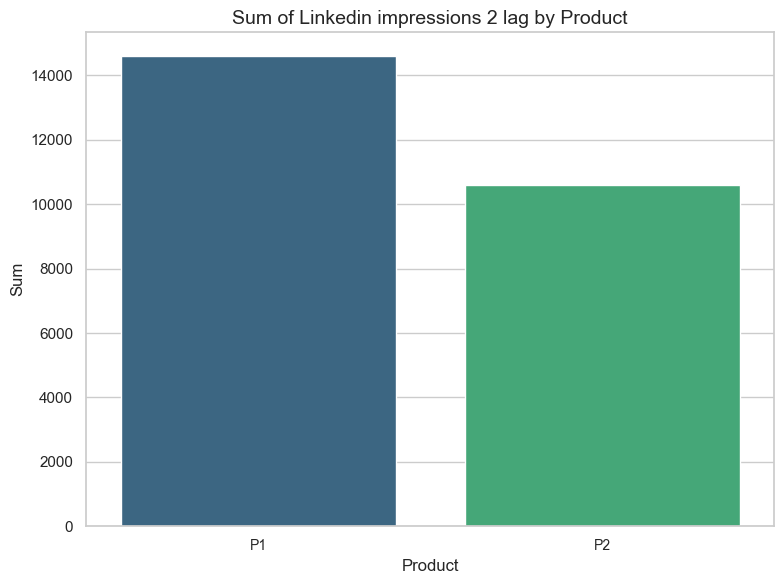



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


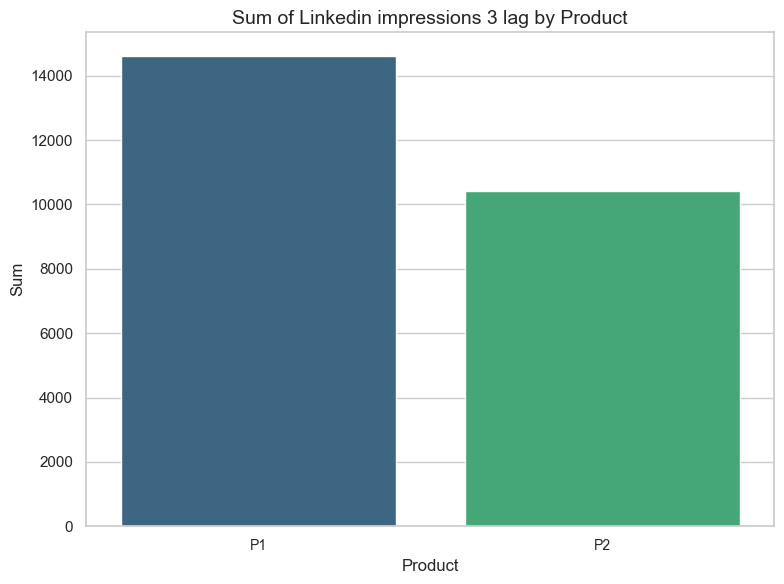



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


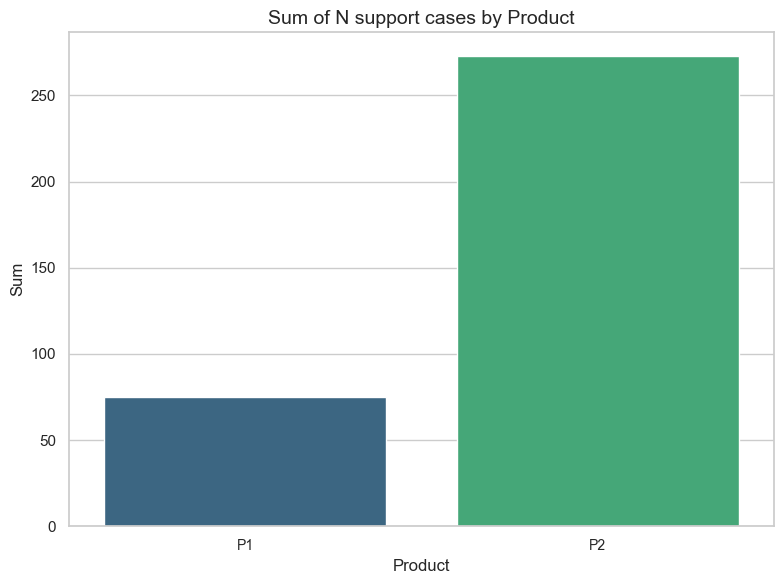



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


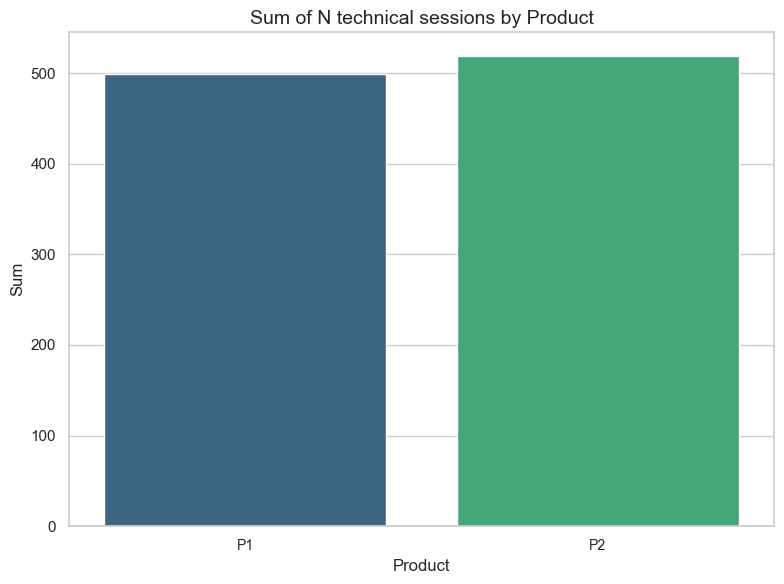



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


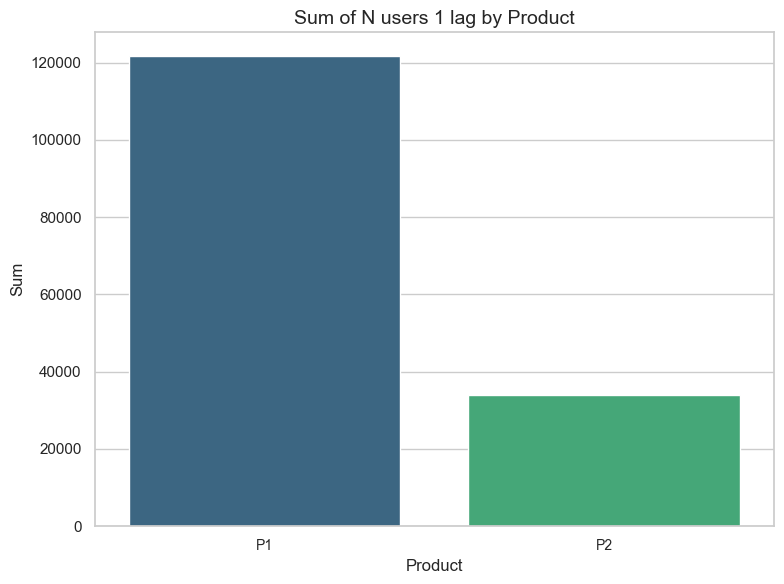



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


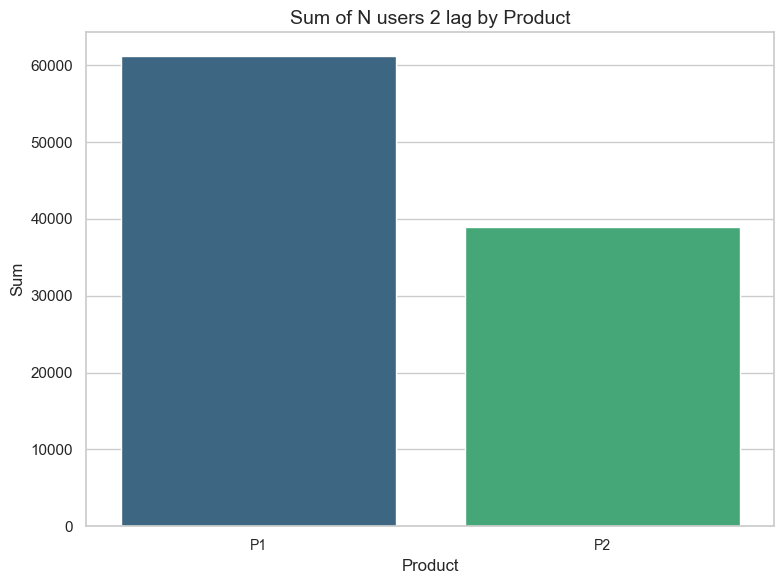



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


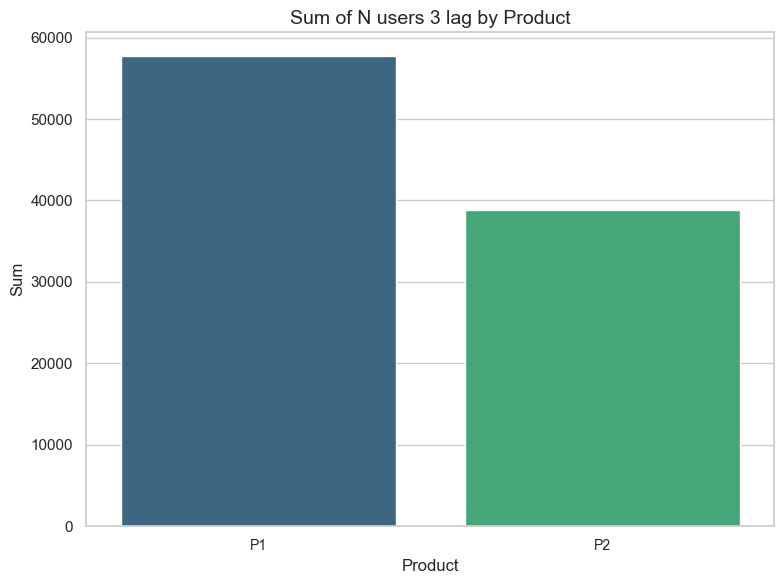



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


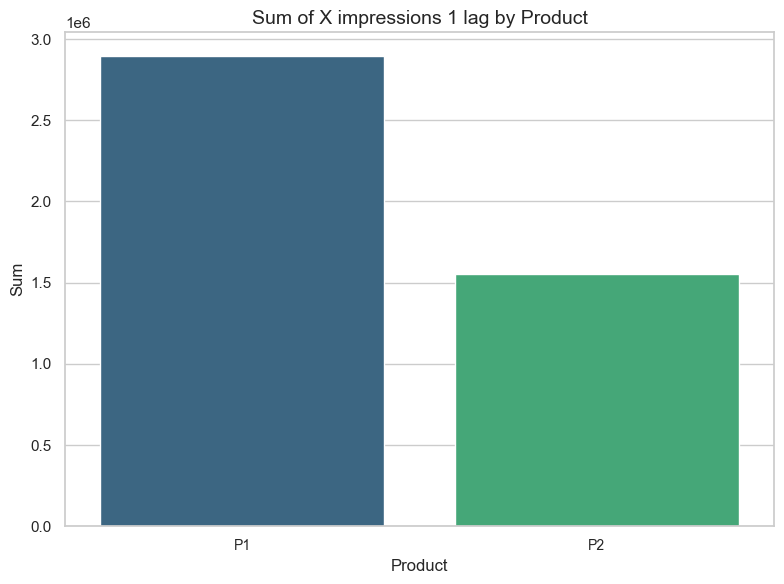



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


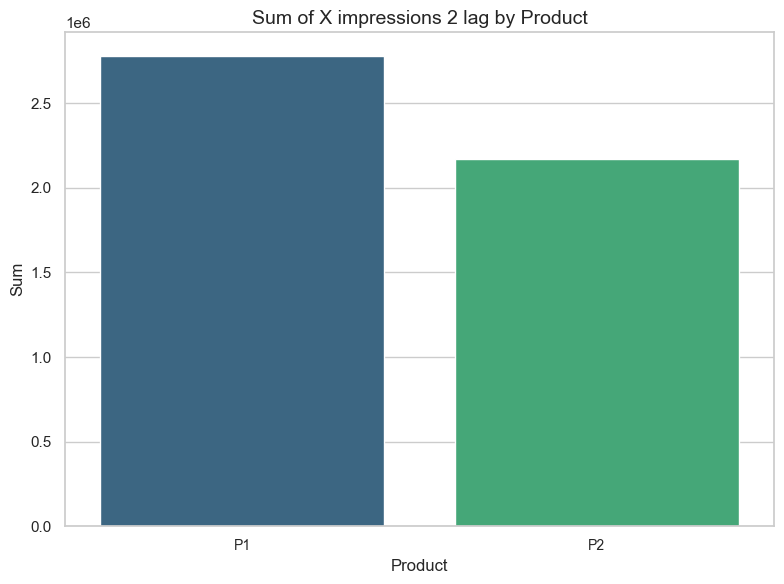



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


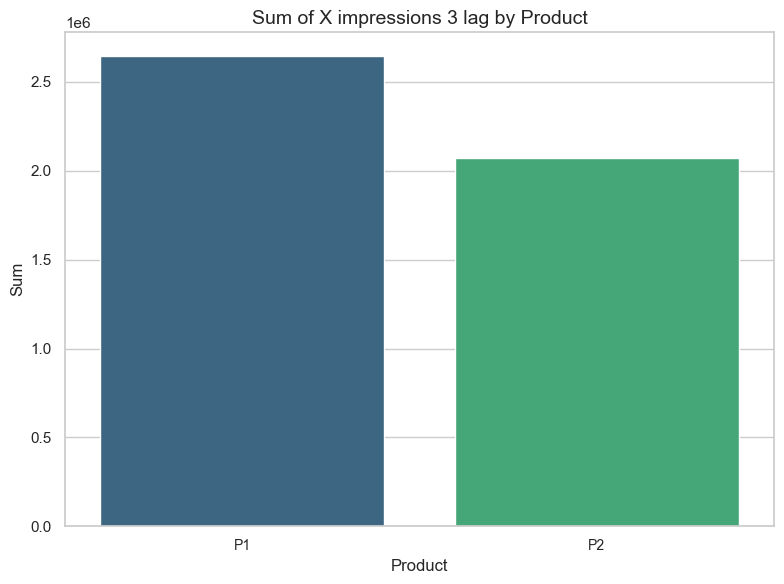



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


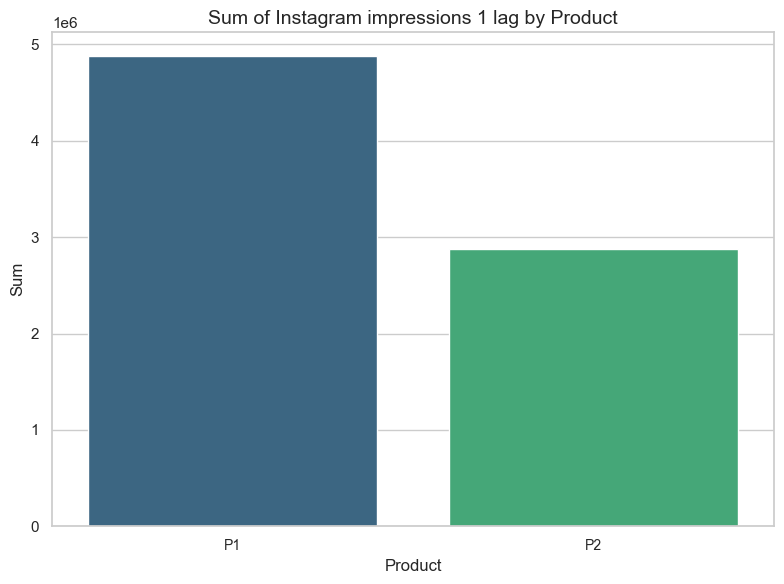



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


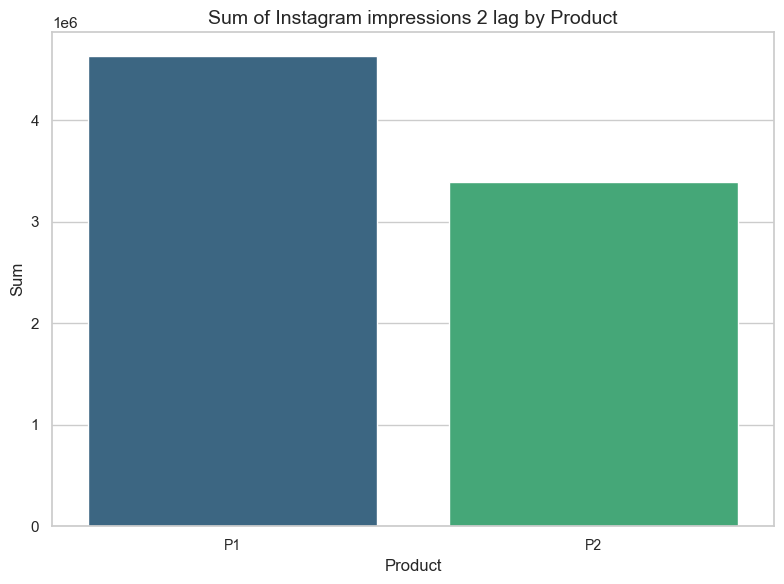



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


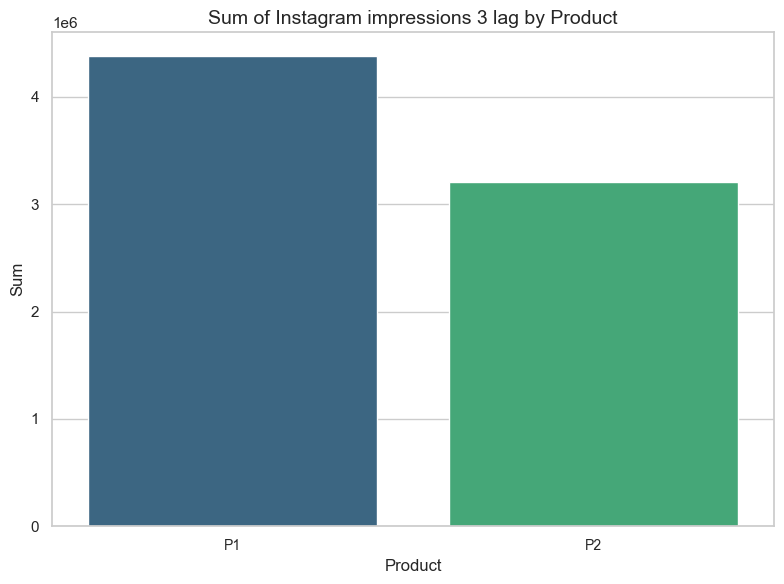



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


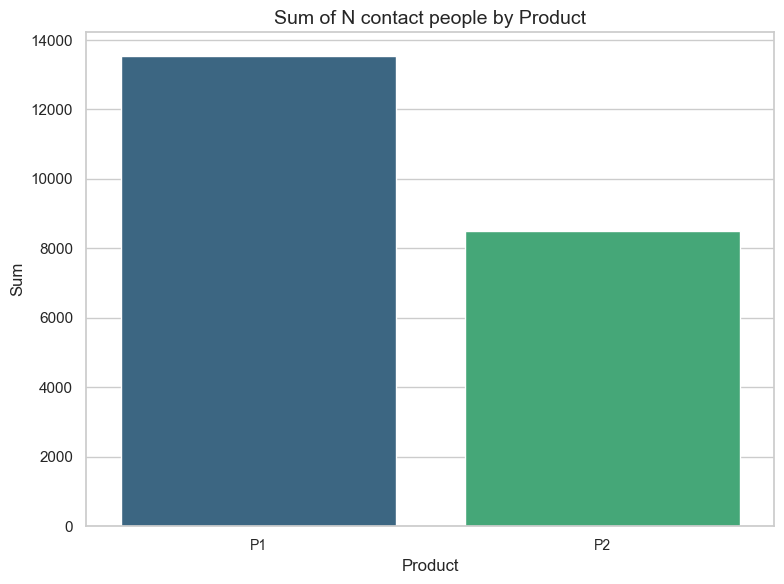



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


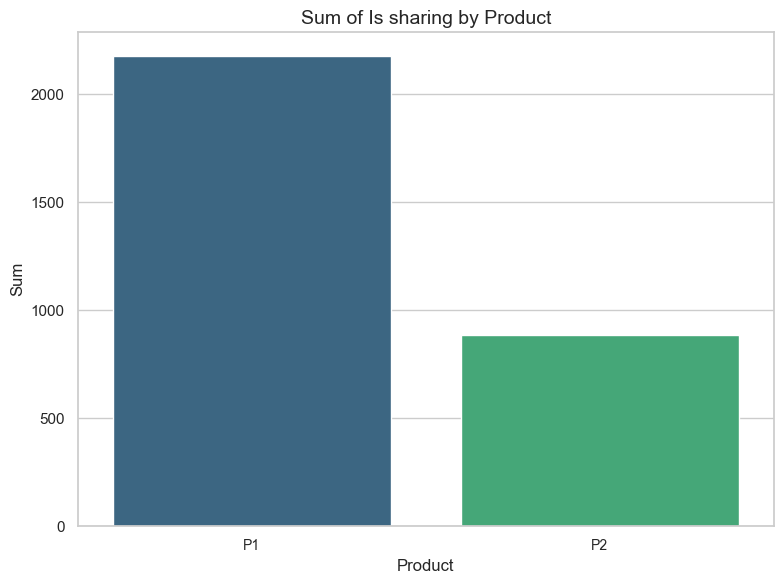



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


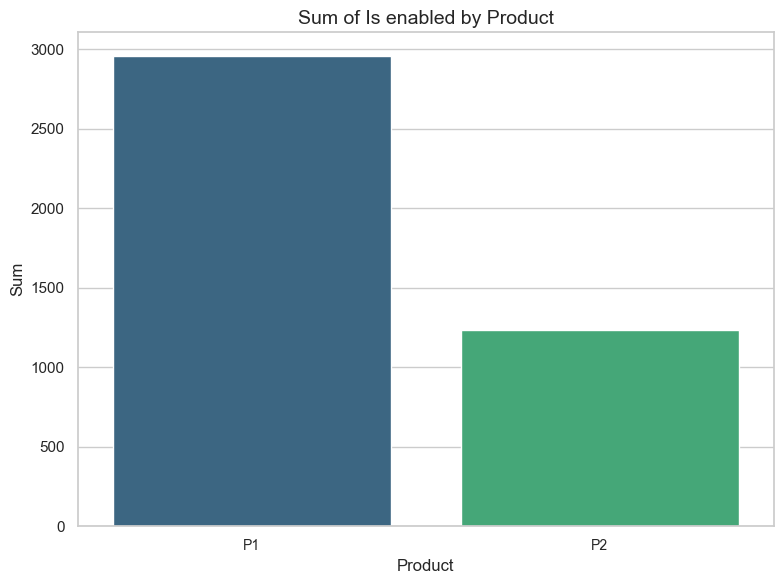



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


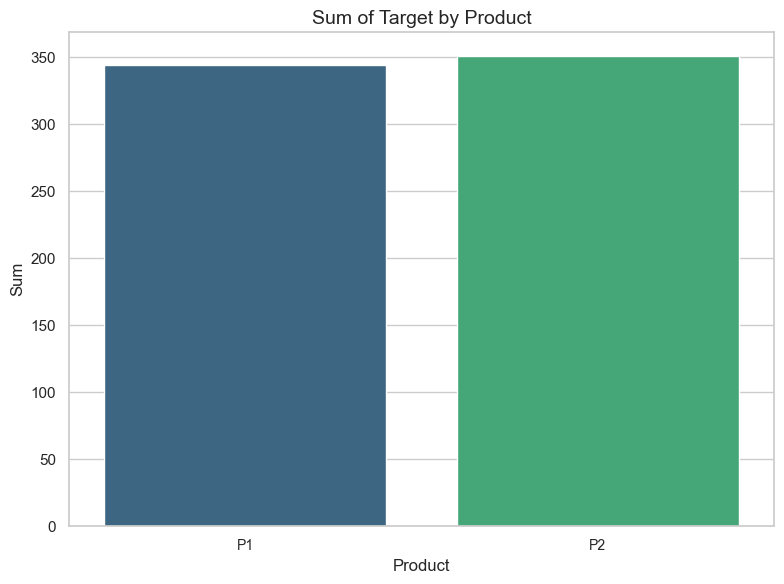

In [240]:
# run this with sum, count and mean
numeric_columns = [
    'facebook_impressions_1_lag', 'facebook_impressions_2_lag', 'facebook_impressions_3_lag',
    'linkedin_impressions_1_lag', 'linkedin_impressions_2_lag', 'linkedin_impressions_3_lag',
    'n_support_cases', 'n_technical_sessions', 'n_users_1_lag', 'n_users_2_lag', 'n_users_3_lag',
    'x_impressions_1_lag', 'x_impressions_2_lag', 'x_impressions_3_lag',
    'instagram_impressions_1_lag', 'instagram_impressions_2_lag', 'instagram_impressions_3_lag',
    'n_contact_people', 'is_sharing', 'is_enabled', 'target'
]

count_data = data.groupby('product')[numeric_columns].sum().reset_index()
for metric in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=count_data, x='product', y=metric, palette='viridis')
    plt.title(f'Sum of {metric.replace("_", " ").capitalize()} by Product', fontsize=14)
    plt.ylabel('Sum', fontsize=12)
    plt.xlabel('Product', fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


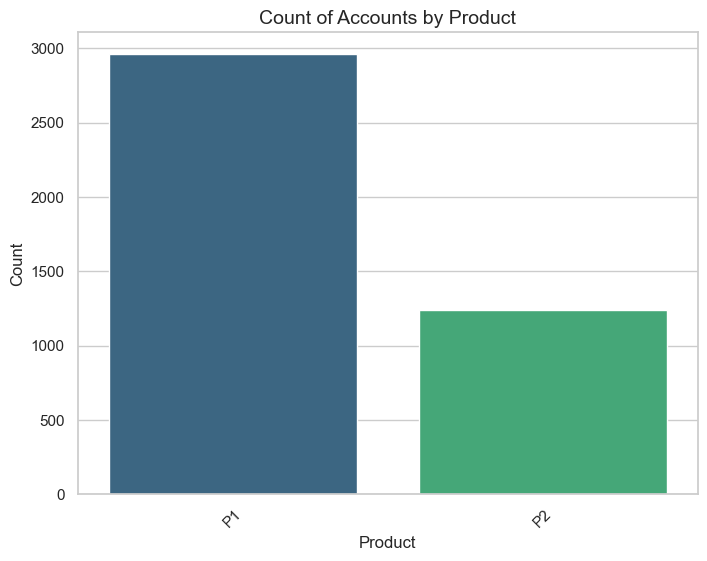

In [133]:
product_counts = data['product'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.title('Count of Accounts by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


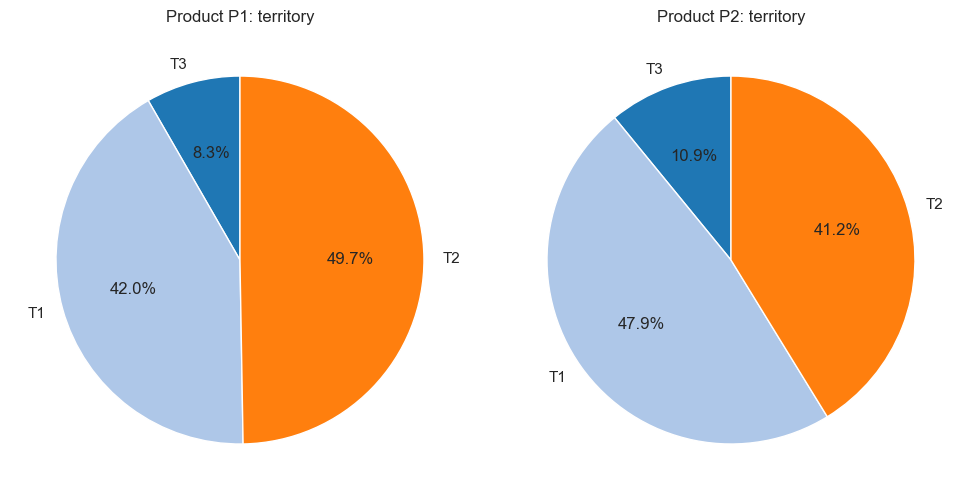

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


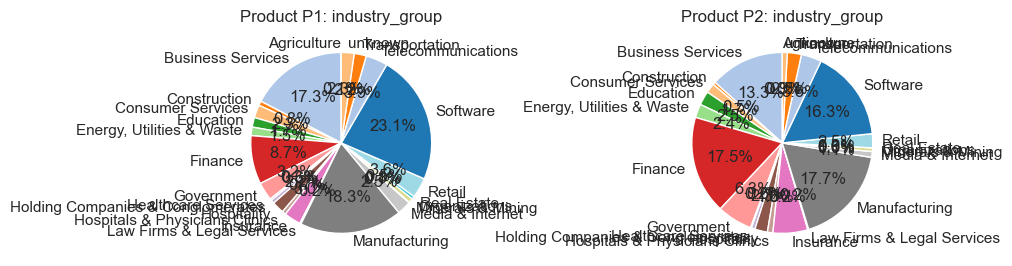

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


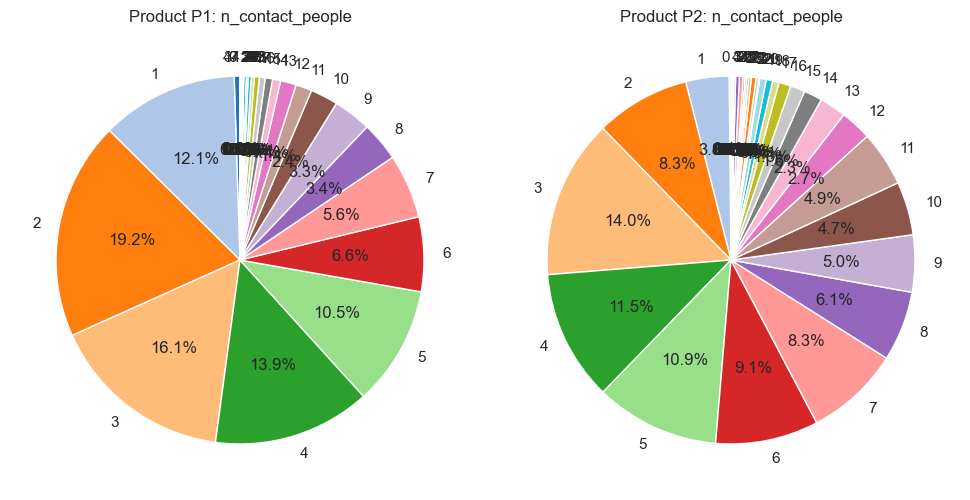

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


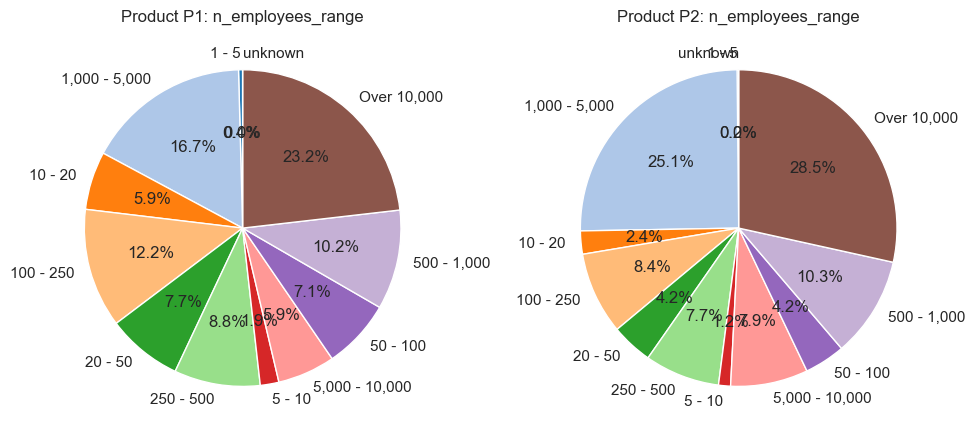

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


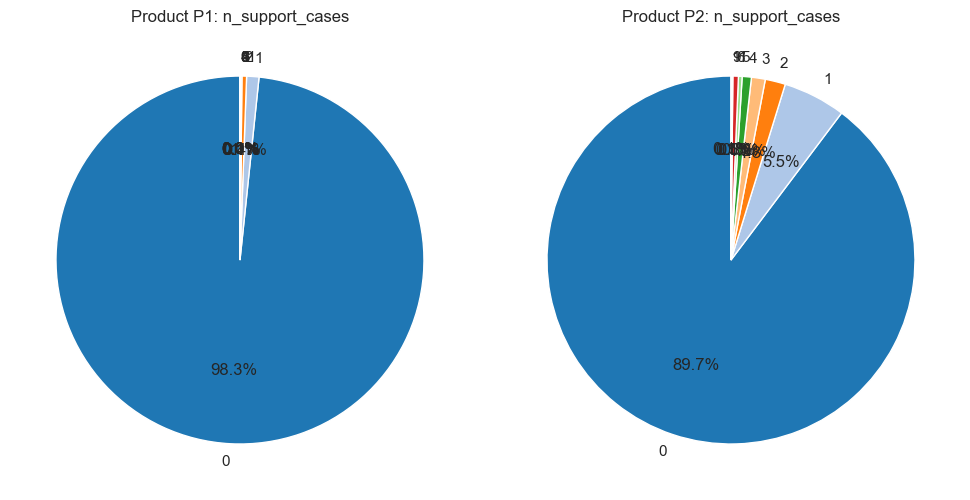

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


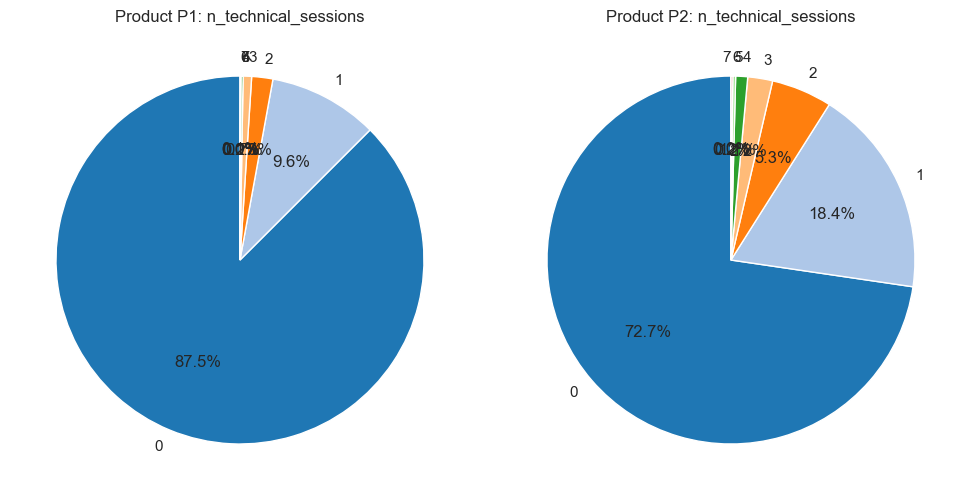

In [132]:
features = ['territory', 'industry_group', 'n_contact_people', 'n_employees_range', 'n_support_cases', 'n_technical_sessions']

for ff in features:
    grouped_data = data.groupby(['product', ff]).size().unstack(fill_value=0)
    fig, axes = plt.subplots(1, len(grouped_data), figsize=(10, 5))
    for i, (product, counts) in enumerate(grouped_data.iterrows()):
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
        axes[i].set_title(f"Product {product}: {ff}")
    plt.tight_layout()
    plt.show()


/var/folders/9t/msh0s7lj6nl9lmxf_kw6jlkm0000gn/T/ipykernel_73926/3702601679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_impressions = data.groupby('product')[


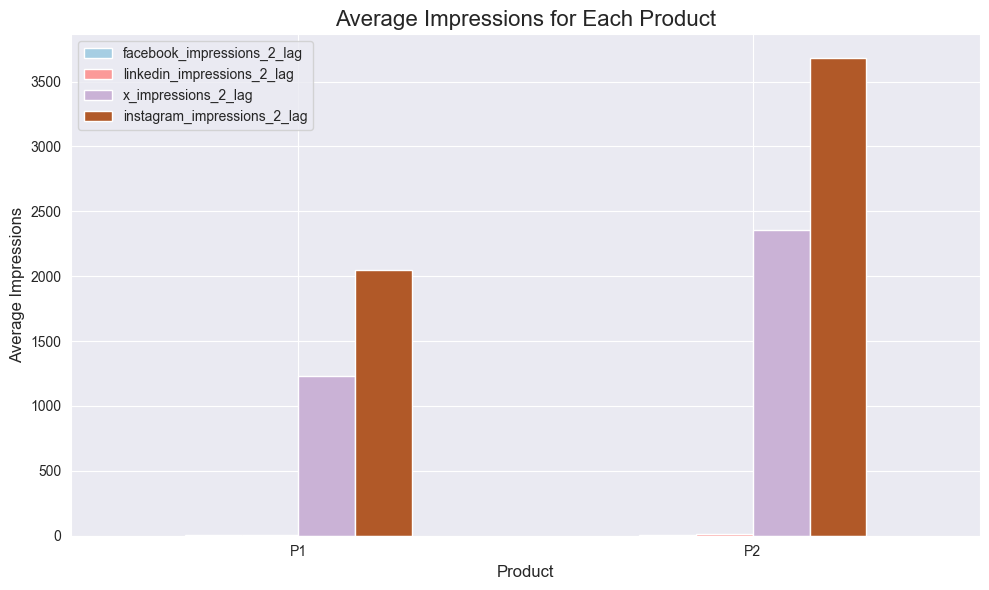

Average Impressions for Each Product Type:
         facebook_impressions_2_lag  linkedin_impressions_2_lag  \
product                                                           
P1                         7.663717                    6.463274   
P2                         7.188925                   11.514658   

         x_impressions_2_lag  instagram_impressions_2_lag  
product                                                    
P1               1230.324923                  2050.665339  
P2               2356.880565                  3679.288817  


In [76]:
avg_impressions = data.groupby('product')[
    ['facebook_impressions_2_lag', 'linkedin_impressions_2_lag', 'x_impressions_2_lag', 'instagram_impressions_2_lag']
].mean()

avg_impressions.plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title('Average Impressions for Each Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Average Impressions', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()
print("Average Impressions for Each Product Type:")
print(avg_impressions)

In [ ]:
#Engagement Analysis: Compare customer engagement across P1 and P2.

Engagement Summary:
                       P1 Average  P2 Average  P1 Total  P2 Total
n_users_1_lag          41.127027   27.502829    121736     34021
n_users_2_lag          20.679054    31.50768     61210     38975
n_users_3_lag          19.511486   31.355699     57754     38787
n_support_cases         0.025338    0.220695        75       273
n_technical_sessions    0.168581    0.419563       499       519
n_contact_people        4.575676    6.877122     13544      8507


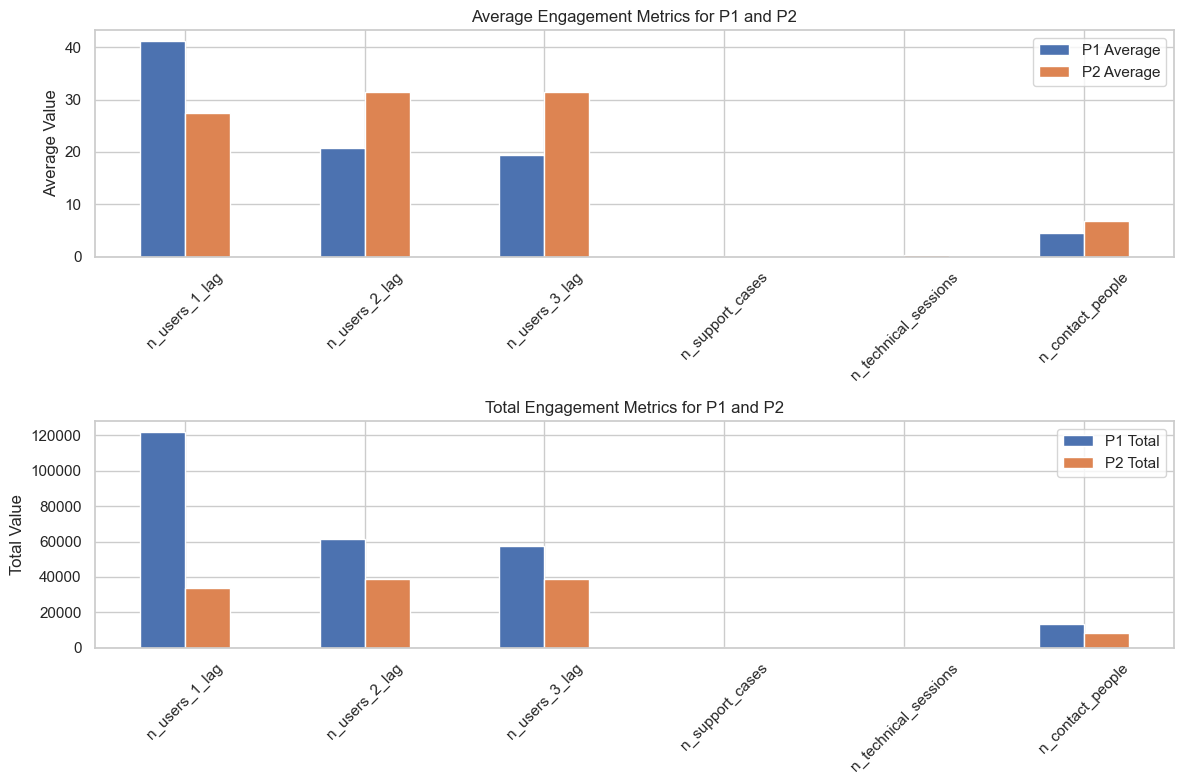

In [139]:
p1_data = data[data['product'] == 'P1']
p2_data = data[data['product'] == 'P2']

customer_behavior_metrics = ['n_users_1_lag', 'n_users_2_lag', 'n_users_3_lag',
                      'n_support_cases', 'n_technical_sessions', 'n_contact_people']

p1_engagement = p1_data[customer_behavior_metrics].mean().rename('P1 Average').to_frame()
p1_total = p1_data[customer_behavior_metrics].sum().rename('P1 Total').to_frame()
p2_engagement = p2_data[customer_behavior_metrics].mean().rename('P2 Average').to_frame()
p2_total = p2_data[customer_behavior_metrics].sum().rename('P2 Total').to_frame()

engagement_summary = pd.concat([p1_engagement, p2_engagement, p1_total, p2_total], axis=1)
print("Engagement Summary:\n", engagement_summary)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
engagement_summary[['P1 Average', 'P2 Average']].plot(kind='bar', ax=plt.gca())
plt.title('Average Engagement Metrics for P1 and P2')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2, 1, 2)
engagement_summary[['P1 Total', 'P2 Total']].plot(kind='bar', ax=plt.gca())
plt.title('Total Engagement Metrics for P1 and P2')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Territory Analysis: Assess how customer behavior varies by territory (T1, T2, T3) within P1 and P2

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


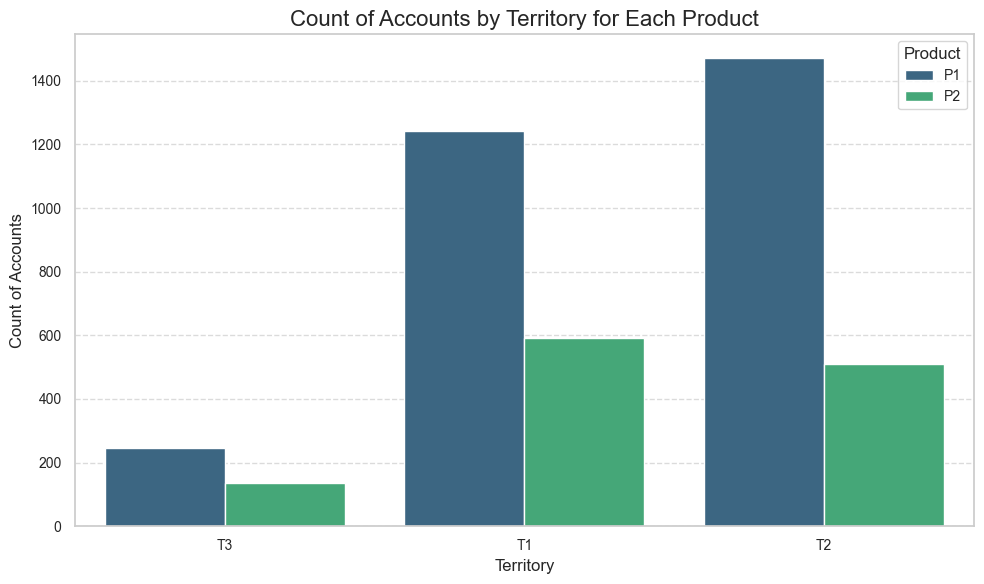

In [241]:
territory_counts = data.groupby(['territory', 'product'])['account_id'].count().reset_index()
territory_counts.rename(columns={'account_id': 'Count'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=territory_counts, x='territory', y='Count', hue='product', ci=None, palette='viridis')
plt.title('Count of Accounts by Territory for Each Product', fontsize=16)
plt.xlabel('Territory', fontsize=12)
plt.ylabel('Count of Accounts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Product', title_fontsize=12, fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


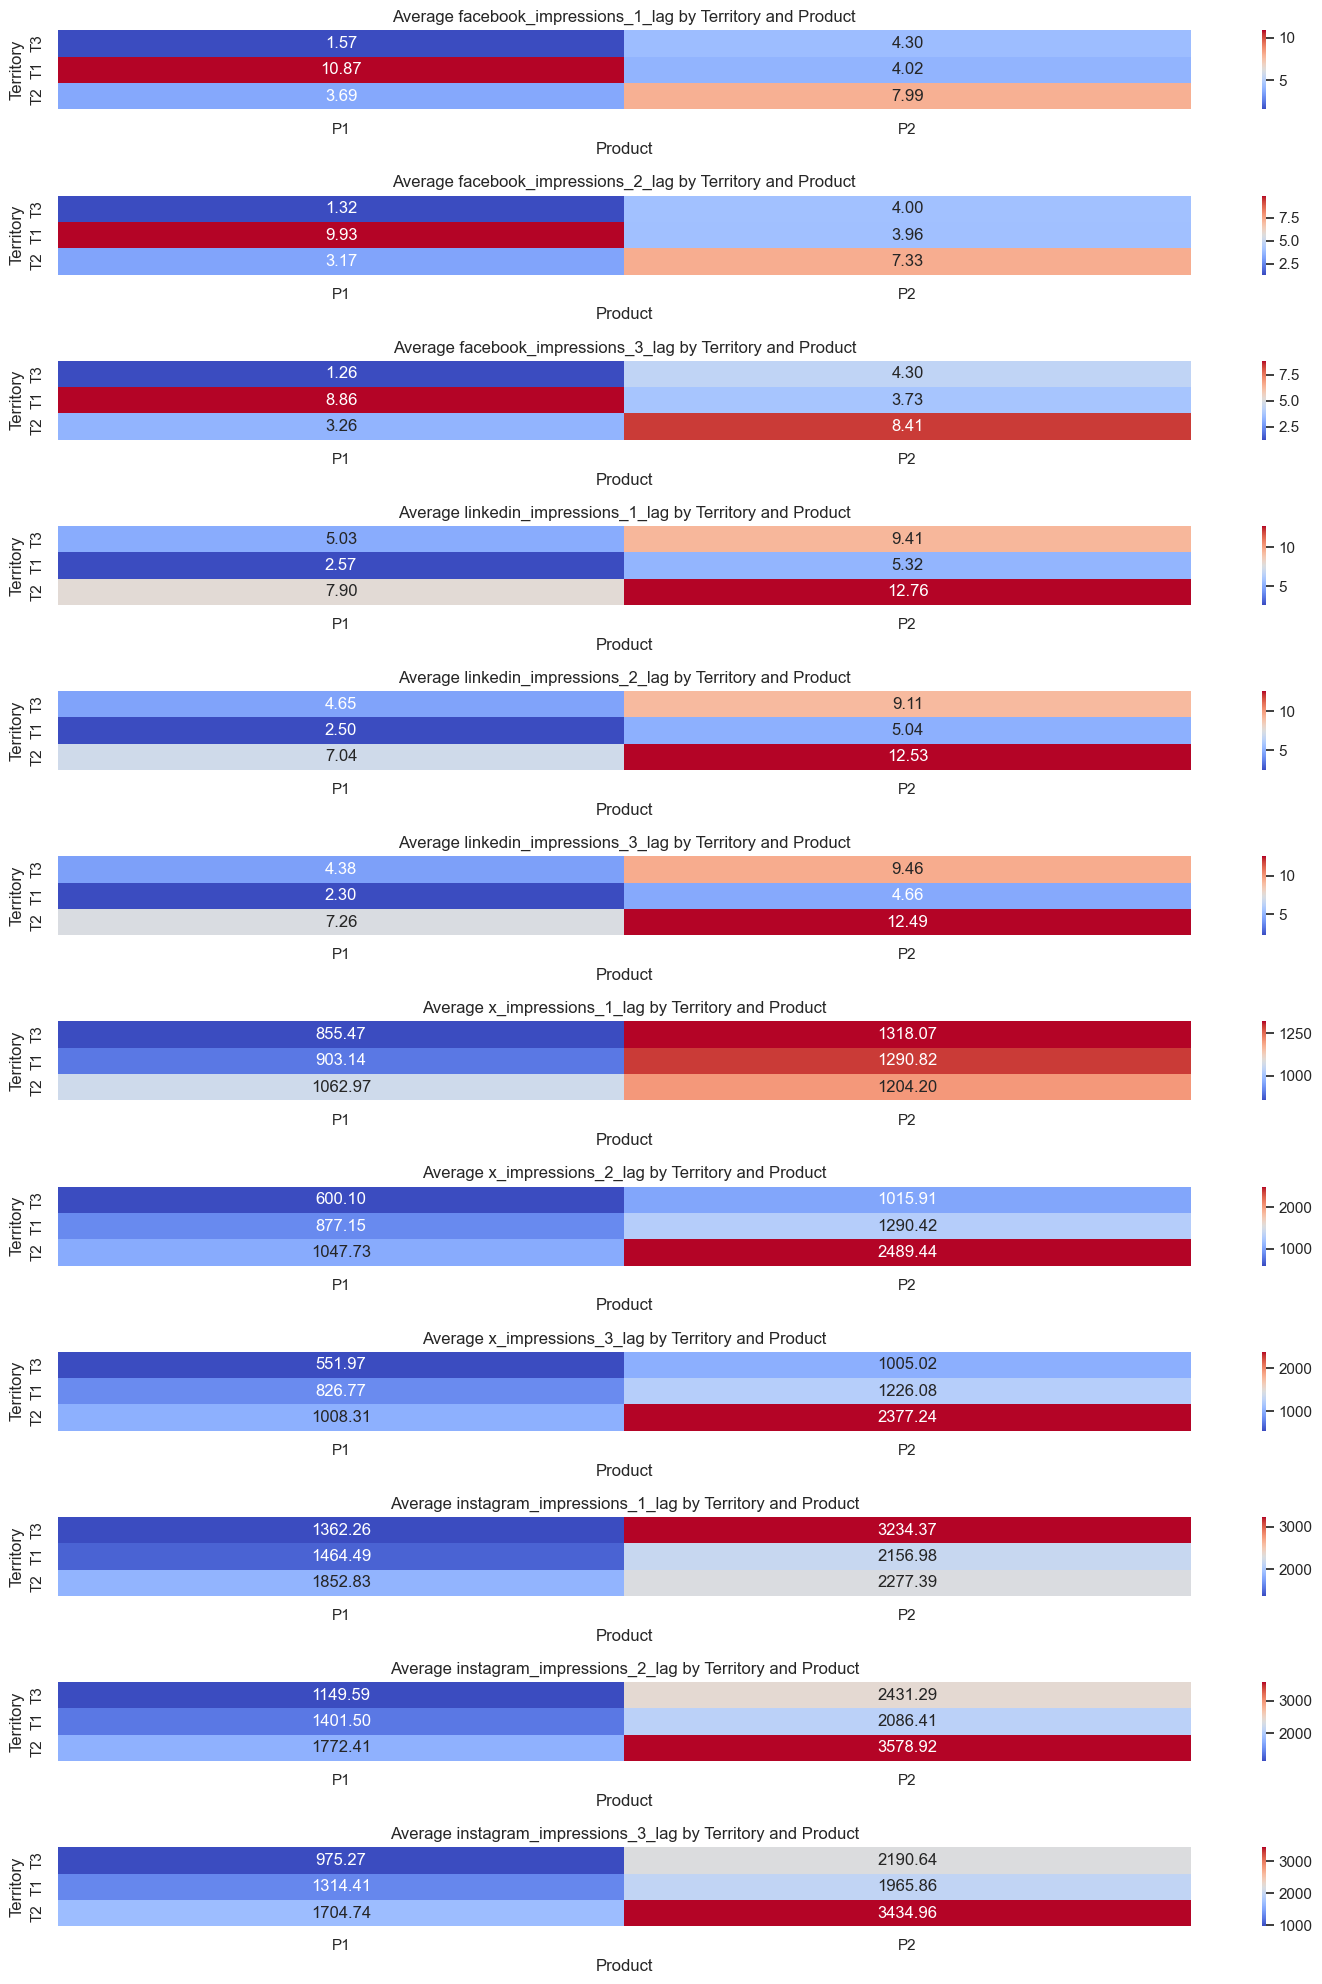

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


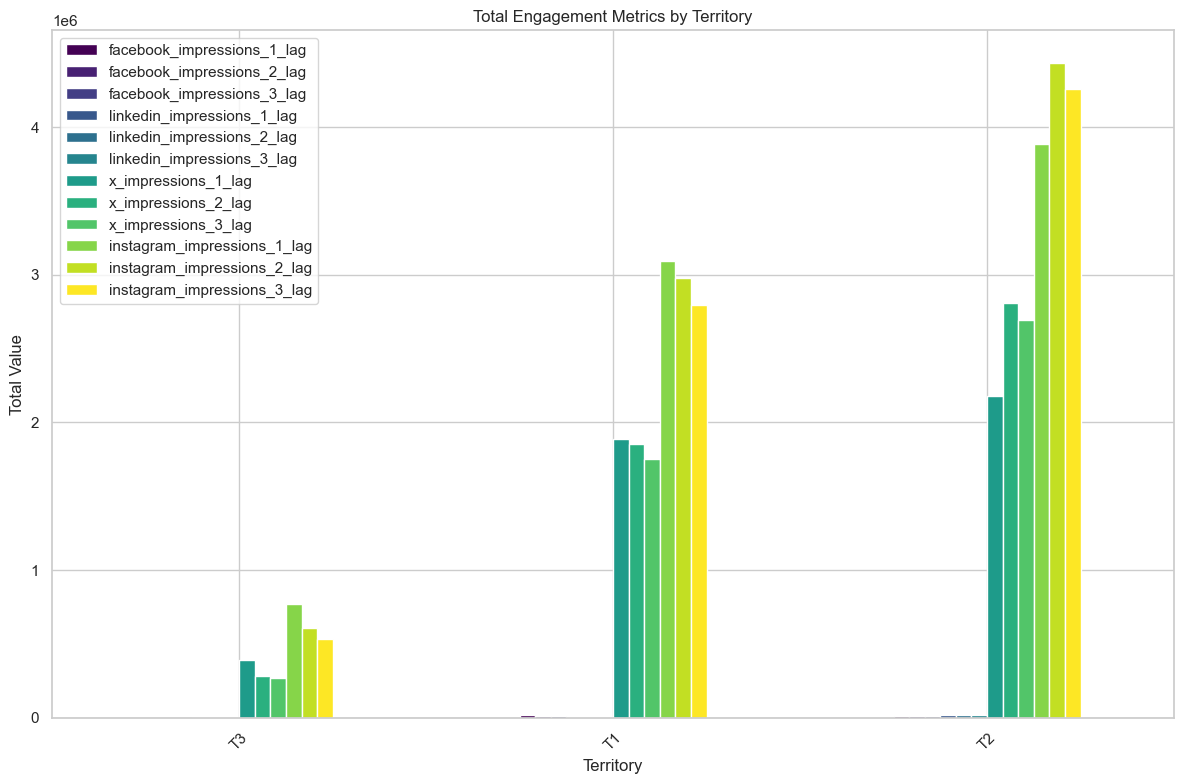

In [146]:
customer_behavior_metrics = ['facebook_impressions_1_lag',
       'facebook_impressions_2_lag', 'facebook_impressions_3_lag',
       'linkedin_impressions_1_lag', 'linkedin_impressions_2_lag',
       'linkedin_impressions_3_lag', 'x_impressions_1_lag', 'x_impressions_2_lag',
       'x_impressions_3_lag', 'instagram_impressions_1_lag',
       'instagram_impressions_2_lag', 'instagram_impressions_3_lag']

# customer_behavior_metrics = ['n_users_1_lag', 'n_users_2_lag', 'n_users_3_lag',
#                       'n_support_cases', 'n_technical_sessions', 'n_contact_people']

data[customer_behavior_metrics] = data[customer_behavior_metrics].apply(pd.to_numeric, errors='coerce')
territory_summary = data.groupby(['territory', 'product'])[customer_behavior_metrics].mean().reset_index()
territory_pivot = territory_summary.pivot(index='territory', columns='product', values=customer_behavior_metrics)

plt.figure(figsize=(15, 20))
for i, metric in enumerate(customer_behavior_metrics):
    plt.subplot(len(customer_behavior_metrics), 1, i + 1)
    sns.heatmap(territory_pivot[metric].astype(float), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f"Average {metric} by Territory and Product")
    plt.ylabel('Territory')
    plt.xlabel('Product')
plt.tight_layout()
plt.show()

territory_totals = data.groupby(['territory'])[customer_behavior_metrics].sum()
plt.figure(figsize=(12, 8))
territory_totals.plot(kind='bar', ax=plt.gca(), colormap='viridis')
plt.title("Total Engagement Metrics by Territory")
plt.ylabel("Total Value")
plt.xlabel("Territory")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Industry Trends: Understand how customer industries influence engagement and impressions.

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


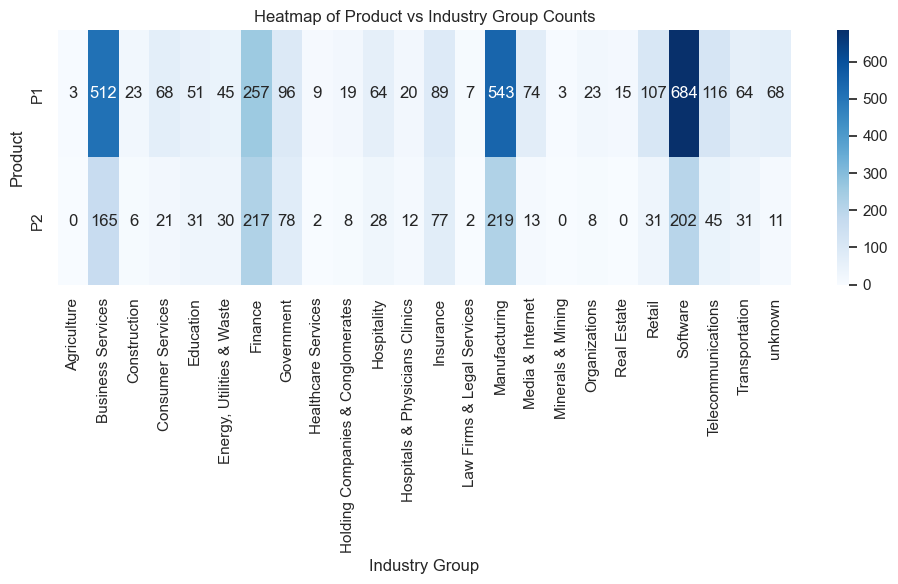

In [221]:
product_industry_counts = data.groupby(['product', 'industry_group']).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(product_industry_counts, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap of Product vs Industry Group Counts')
plt.xlabel('Industry Group')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


x_impressions_1_lag            Int64
instagram_impressions_1_lag    Int64
dtype: object


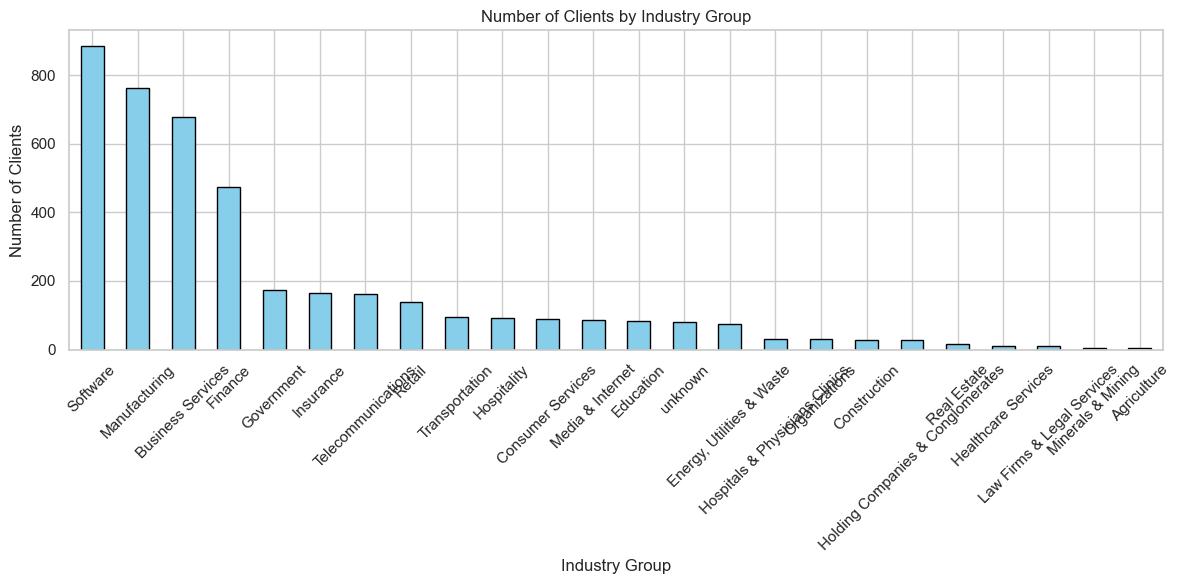

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


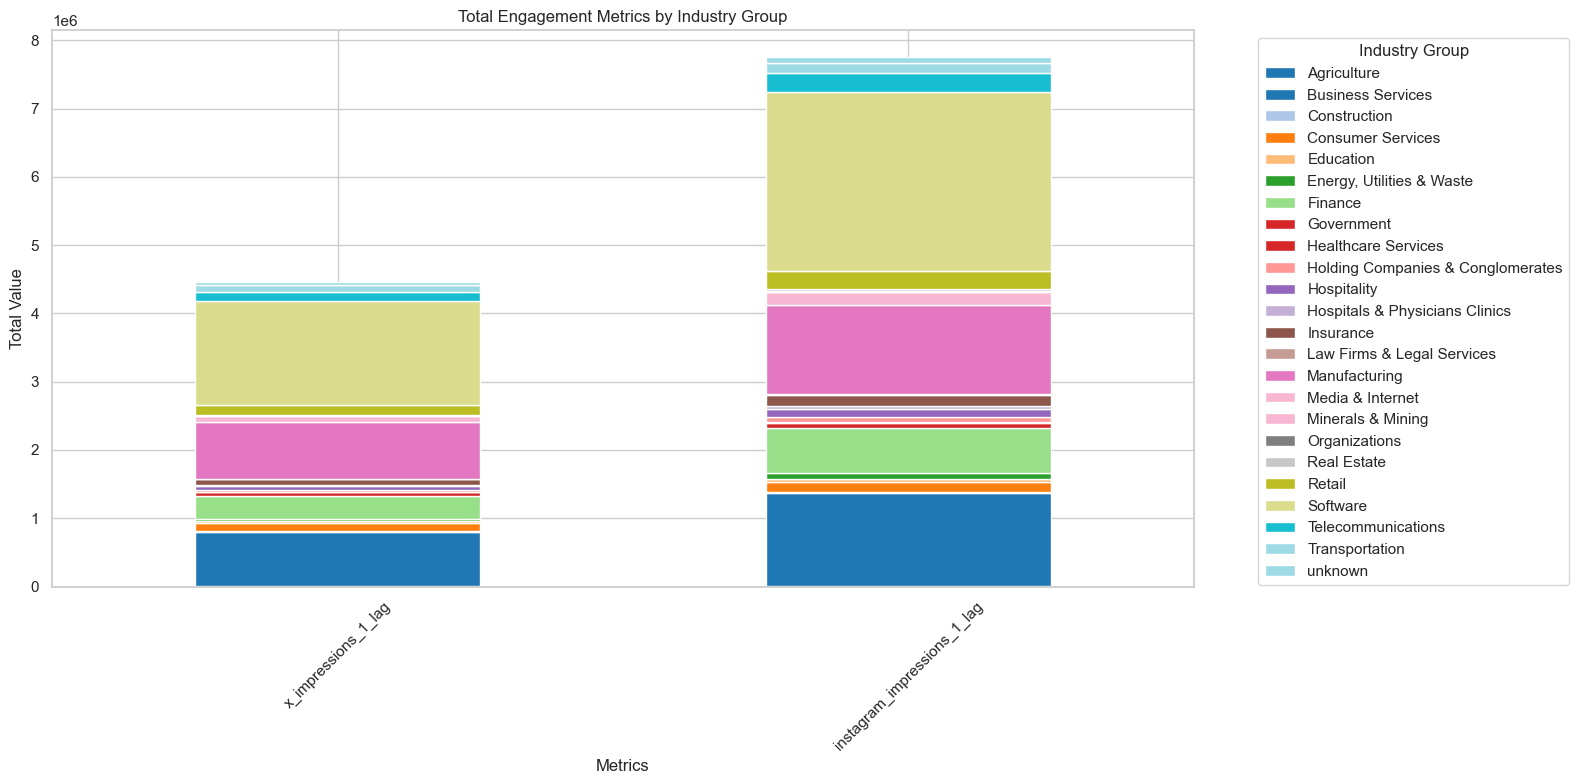

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


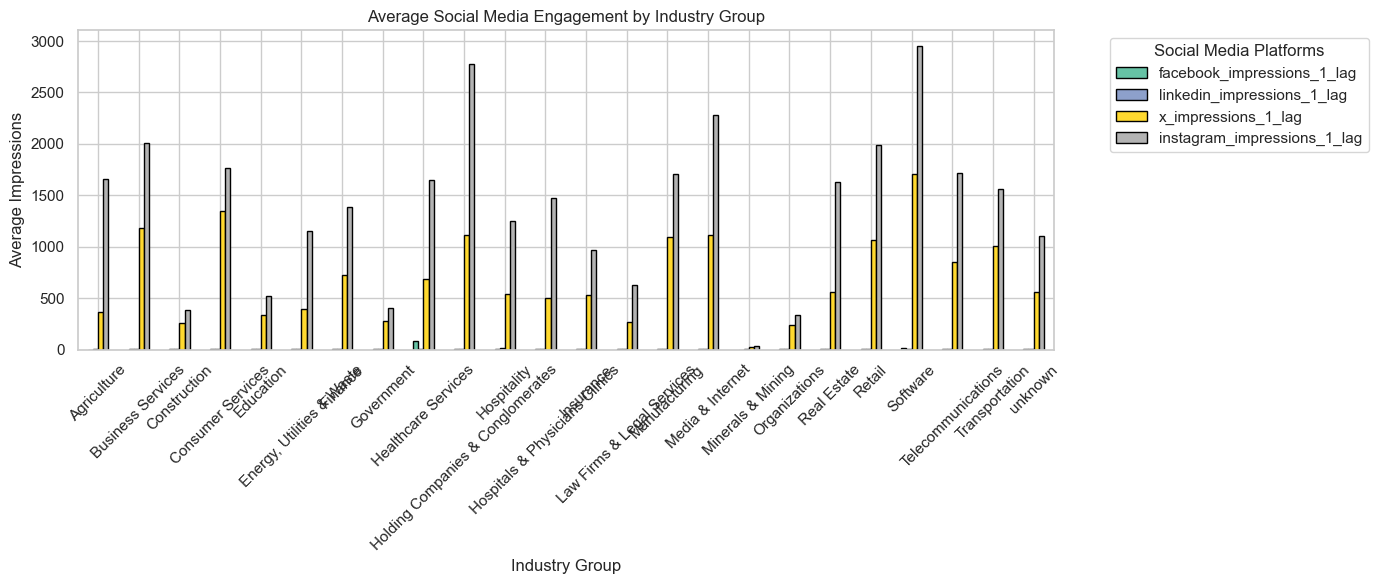

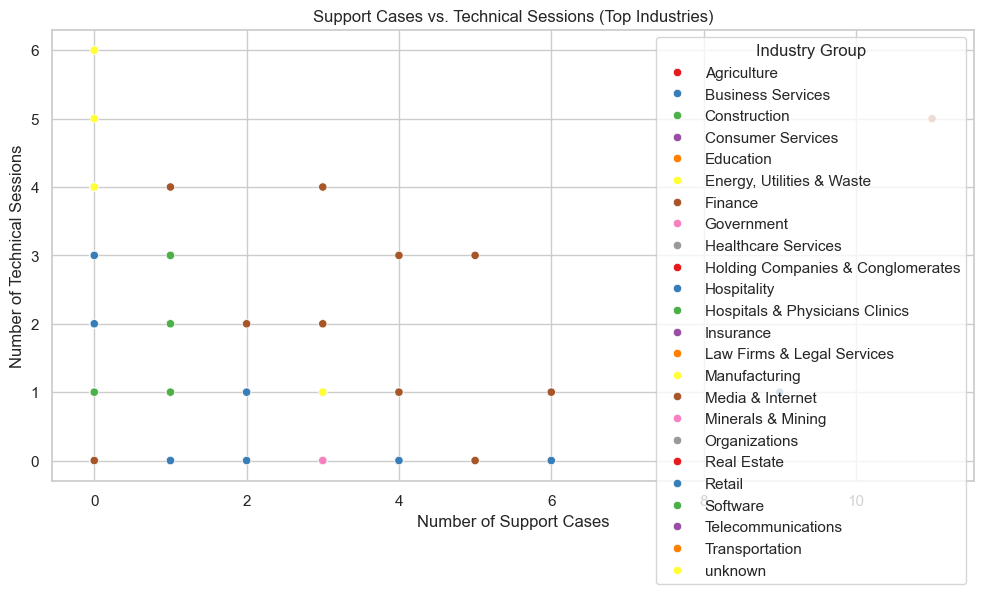

In [182]:
industry_metrics = [
    'x_impressions_1_lag',
    'instagram_impressions_1_lag'
]
# industry_metrics = [
#     'n_support_cases', 'n_technical_sessions', 'n_contact_people',
#     'n_users_1_lag', 'n_users_2_lag', 'n_users_3_lag',
#     'facebook_impressions_1_lag', 'facebook_impressions_2_lag', 'facebook_impressions_3_lag',
#     'linkedin_impressions_1_lag', 'linkedin_impressions_2_lag', 'linkedin_impressions_3_lag',
#     'x_impressions_1_lag', 'x_impressions_2_lag', 'x_impressions_3_lag',
#     'instagram_impressions_1_lag', 'instagram_impressions_2_lag', 'instagram_impressions_3_lag'
# ]

industry_counts = data['industry_group'].value_counts()

plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Clients by Industry Group')
plt.xlabel('Industry Group')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

industry_totals = data.groupby('industry_group')[industry_metrics].sum()
industry_totals.T.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title('Total Engagement Metrics by Industry Group')
plt.ylabel('Total Value')
plt.xlabel('Metrics')
plt.legend(title='Industry Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

social_media_metrics = [
    'facebook_impressions_1_lag', 'linkedin_impressions_1_lag',
    'x_impressions_1_lag', 'instagram_impressions_1_lag'
]
social_media_totals = data.groupby('industry_group')[social_media_metrics].mean()
social_media_totals.plot(kind='bar', figsize=(14, 6), colormap='Set2', edgecolor='black')
plt.title('Average Social Media Engagement by Industry Group')
plt.ylabel('Average Impressions')
plt.xlabel('Industry Group')
plt.legend(title='Social Media Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_industries = industry_counts.nlargest(5).index
top_industry_data = data[data['industry_group'].isin(top_industries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_industry_data,
    x='n_support_cases', y='n_technical_sessions',
    hue='industry_group', palette='Set1'
)
plt.title('Support Cases vs. Technical Sessions (Top Industries)')
plt.xlabel('Number of Support Cases')
plt.ylabel('Number of Technical Sessions')
plt.legend(title='Industry Group')
plt.tight_layout()
plt.show()


In [ ]:
# Social Media Impact: Evaluate the impact of social media impressions on engagement metrics.

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


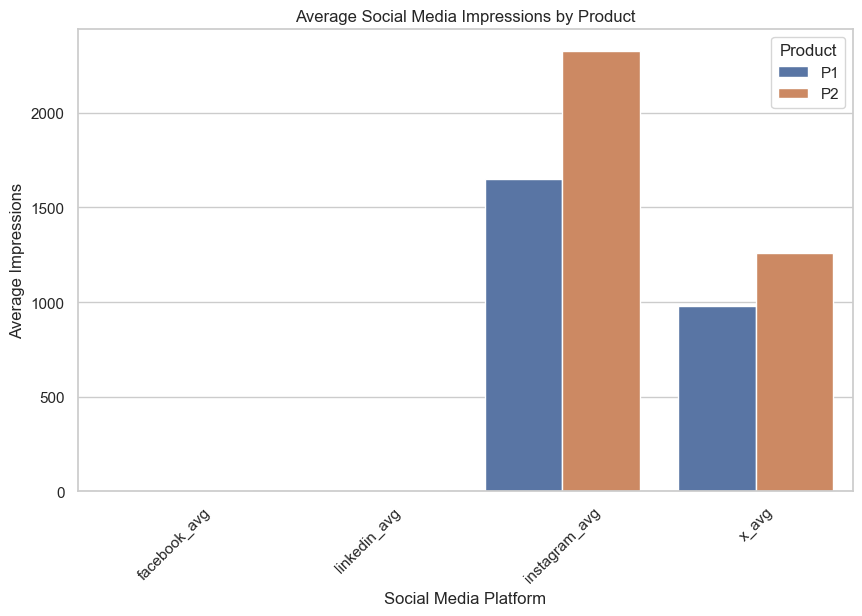

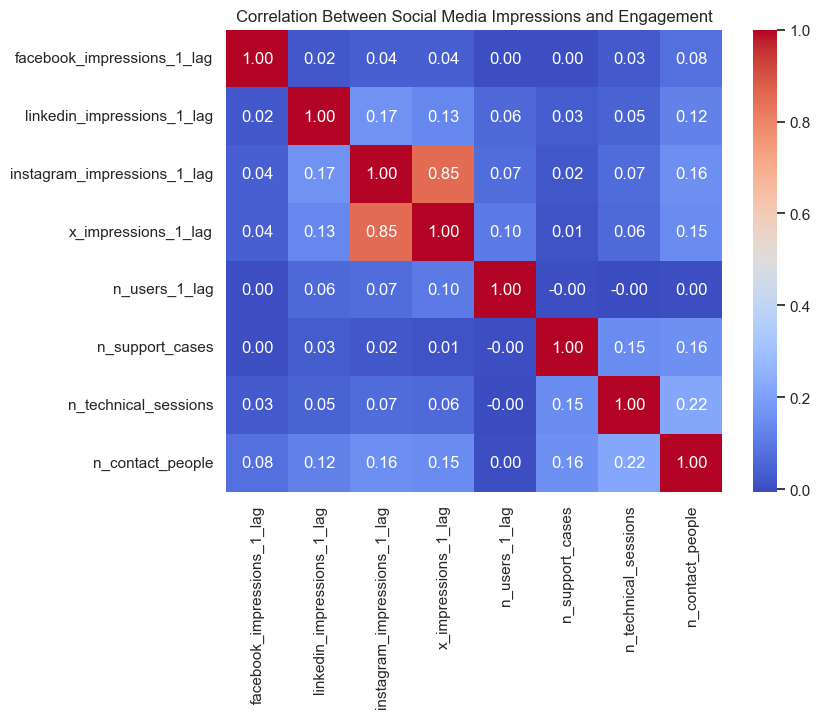

In [184]:
social_media_data = data[data['product'].isin(['P1', 'P2'])]
social_media_averages = social_media_data.groupby('product').agg(
    facebook_avg=('facebook_impressions_1_lag', 'mean'),
    linkedin_avg=('linkedin_impressions_1_lag', 'mean'),
    instagram_avg=('instagram_impressions_1_lag', 'mean'),
    x_avg=('x_impressions_1_lag', 'mean')
).reset_index()

platforms = ['facebook_avg', 'linkedin_avg', 'instagram_avg', 'x_avg']
sns.set(style='whitegrid')
social_media_melted = social_media_averages.melt(id_vars='product',
                                                 value_vars=platforms,
                                                 var_name='Platform',
                                                 value_name='Average Impressions')

plt.figure(figsize=(10, 6))
sns.barplot(data=social_media_melted, x='Platform', y='Average Impressions', hue='product')
plt.title('Average Social Media Impressions by Product')
plt.ylabel('Average Impressions')
plt.xlabel('Social Media Platform')
plt.legend(title='Product', loc='upper right')
plt.xticks(rotation=45)
plt.show()

engagement_correlation = social_media_data[['facebook_impressions_1_lag', 'linkedin_impressions_1_lag',
                                            'instagram_impressions_1_lag', 'x_impressions_1_lag',
                                            'n_users_1_lag', 'n_support_cases', 'n_technical_sessions', 'n_contact_people']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(engagement_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Social Media Impressions and Engagement')
plt.show()


In [ ]:
# Employee Range Influence: Investigate how the client's employee size affects engagement and product choice.

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


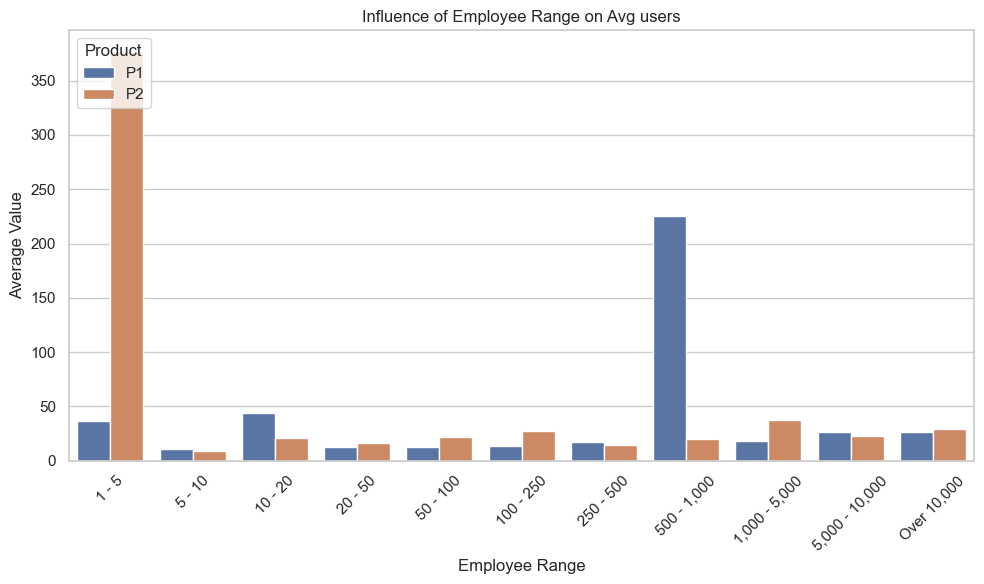



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


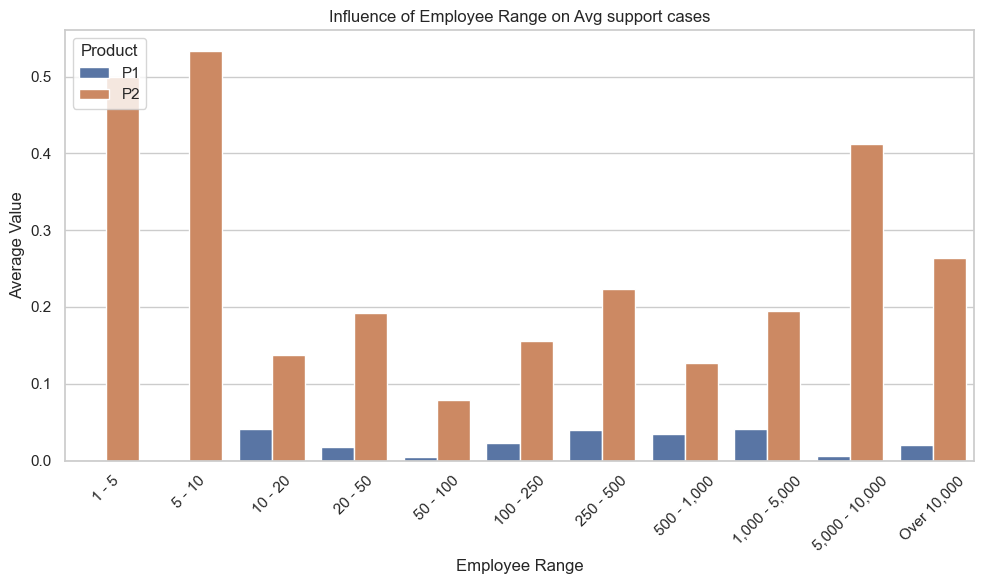



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


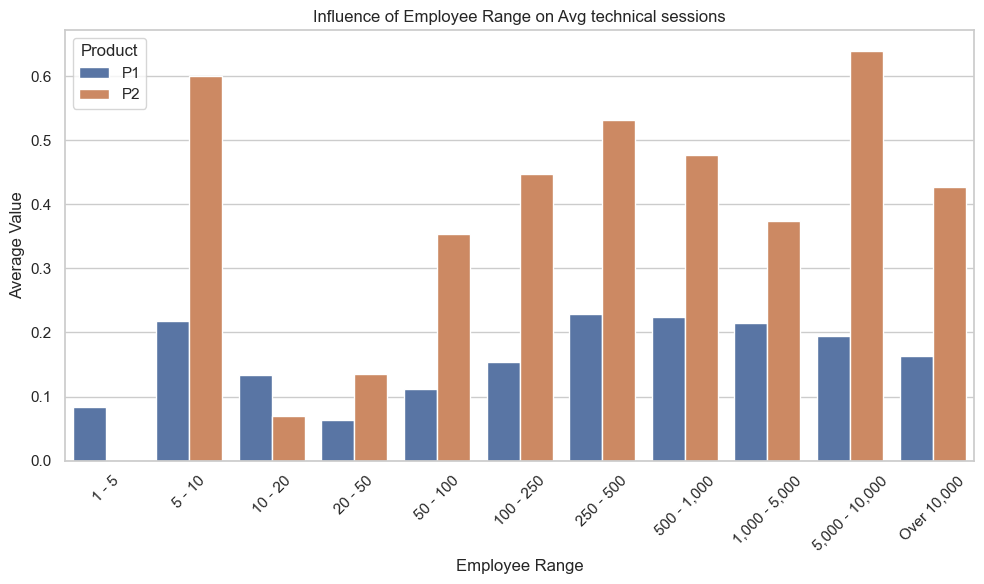



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


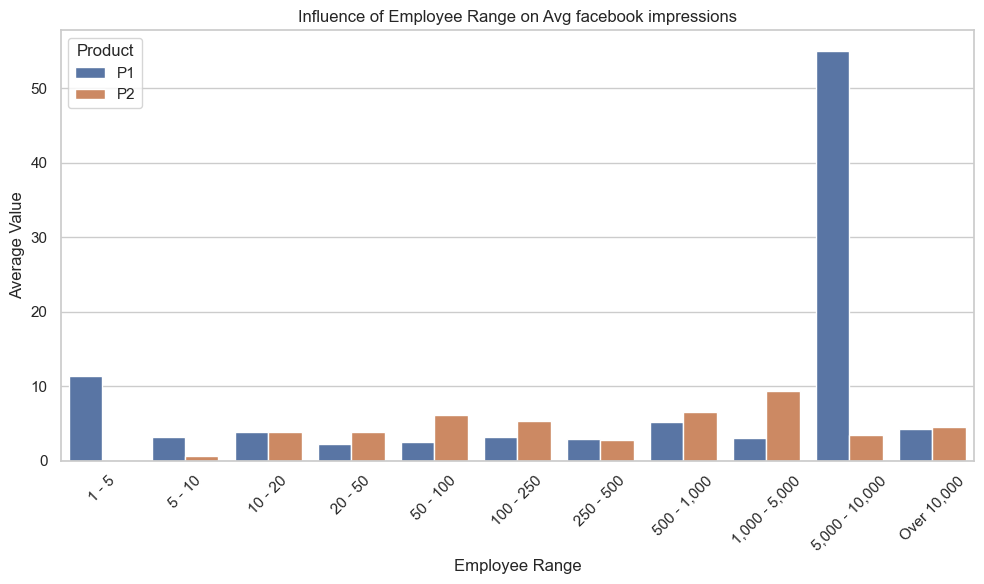



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


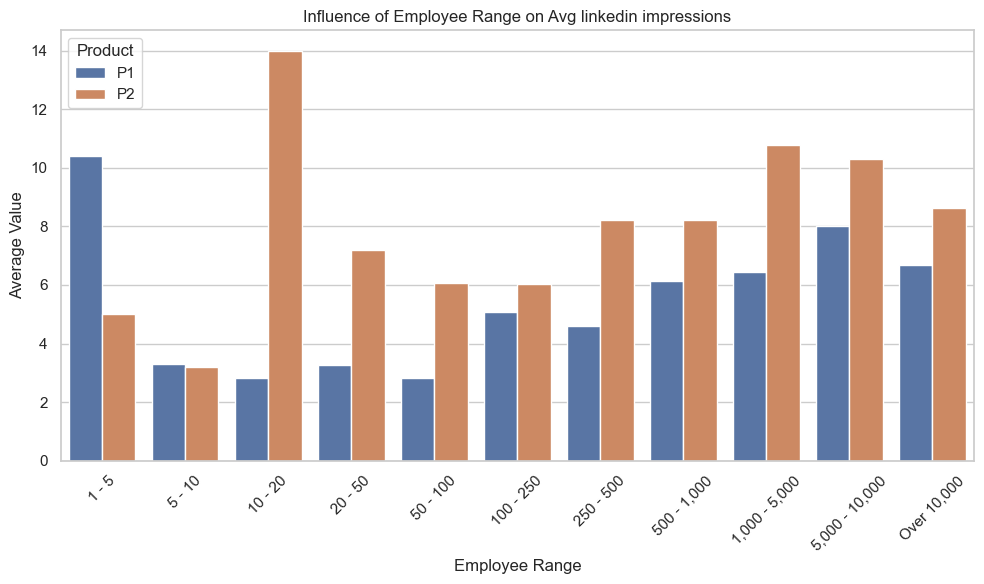



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


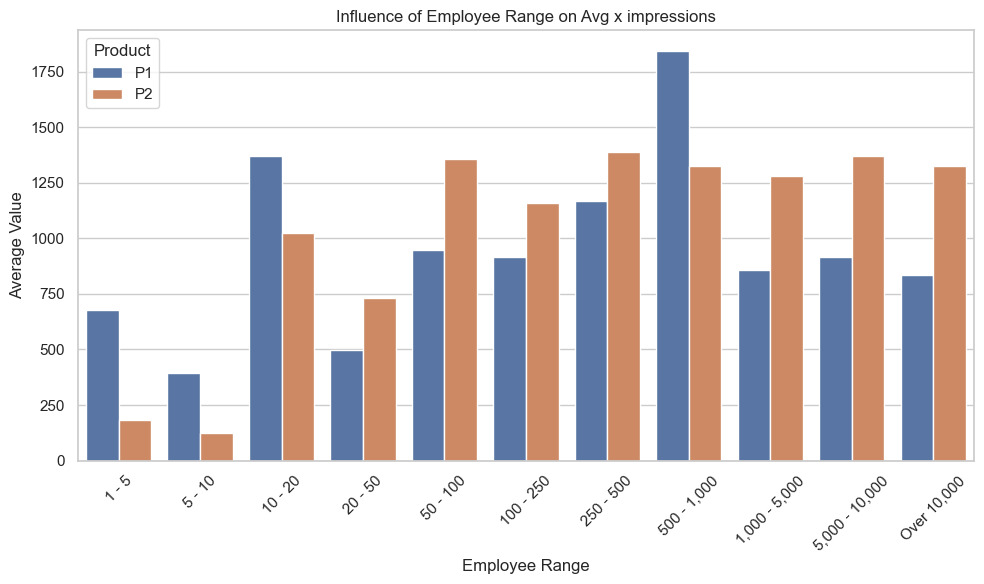



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


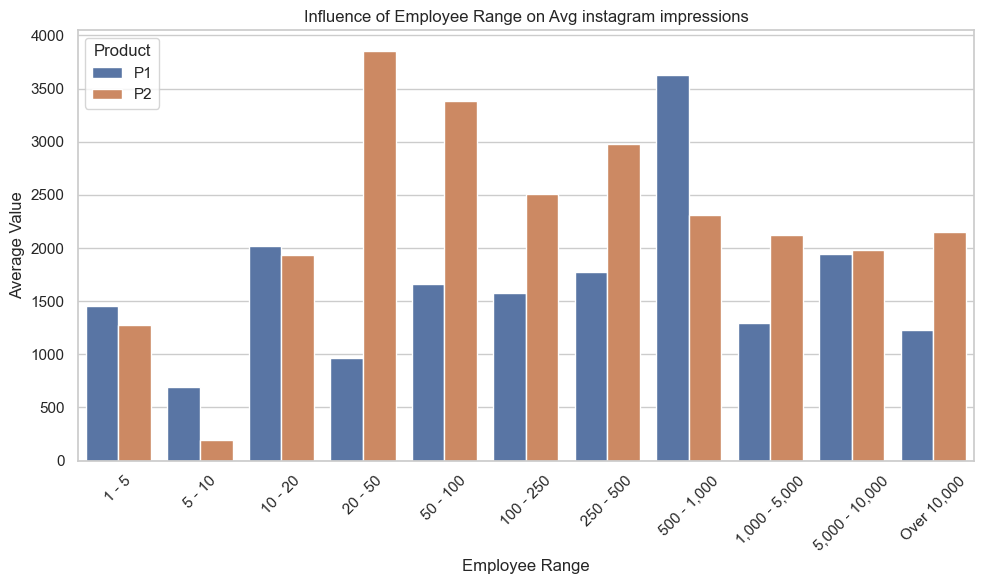

In [198]:
employee_data = data.copy()

# Define a logical order for the n_employees_range categories
employee_data['n_employees_range'] = pd.Categorical(
    employee_data['n_employees_range'],
    categories=[
        '1 - 5', '5 - 10', '10 - 20','20 - 50', '50 - 100', '100 - 250',
        '250 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', 'Over 10,000'
    ],
    ordered=True
)

# Aggregate data
employee_averages = employee_data.groupby(['n_employees_range', 'product']).agg(
    avg_users=('n_users_1_lag', 'mean'),
    avg_support_cases=('n_support_cases', 'mean'),
    avg_technical_sessions=('n_technical_sessions', 'mean'),
    avg_facebook_impressions=('facebook_impressions_1_lag', 'mean'),
    avg_linkedin_impressions=('linkedin_impressions_1_lag', 'mean'),
    avg_x_impressions=('x_impressions_1_lag', 'mean'),
    avg_instagram_impressions=('instagram_impressions_1_lag', 'mean')
).reset_index()

# Melt the data for easier plotting
employee_melted = employee_averages.melt(
    id_vars=['n_employees_range', 'product'],
    value_vars=[
        'avg_users', 'avg_support_cases', 'avg_technical_sessions',
        'avg_facebook_impressions', 'avg_linkedin_impressions',
        'avg_x_impressions', 'avg_instagram_impressions'
    ],
    var_name='Metric',
    value_name='Average'
)

# Loop through metrics and plot
unique_metrics = employee_melted['Metric'].unique()
for metric in unique_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=employee_melted[employee_melted['Metric'] == metric],
        x='n_employees_range',
        y='Average',
        hue='product',
        ci=None,
        order=[
        '1 - 5', '5 - 10', '10 - 20','20 - 50', '50 - 100', '100 - 250',
        '250 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', 'Over 10,000'
    ]
    )
    plt.title(f'Influence of Employee Range on {metric.replace("_", " ").capitalize()}')
    plt.ylabel('Average Value')
    plt.xlabel('Employee Range')
    plt.xticks(rotation=45)
    plt.legend(title='Product', loc='upper left')
    plt.tight_layout()
    plt.show()

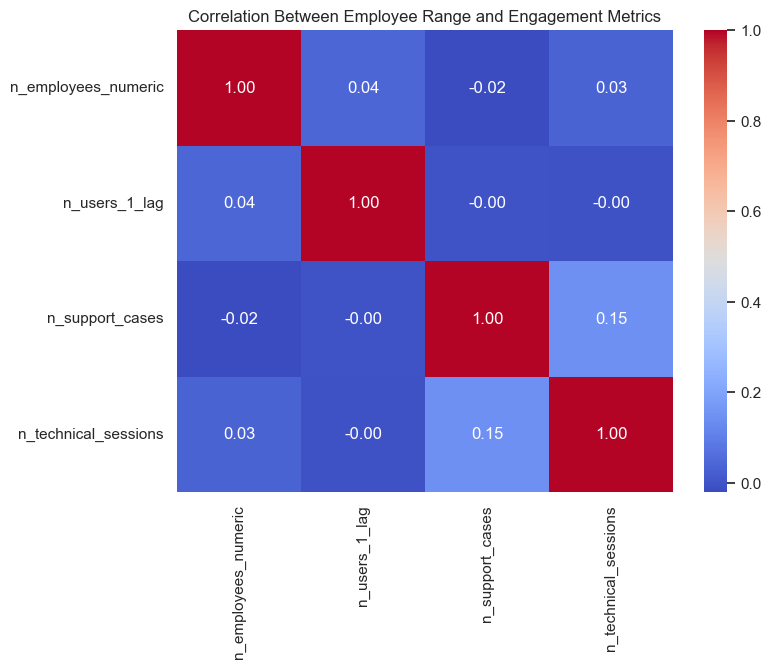

In [188]:
employee_data = data.copy()

employee_correlation_data = employee_data.copy()
employee_correlation_data['n_employees_numeric'] = employee_correlation_data['n_employees_range'].str.extract(r'(\d+)').astype(float)

correlation_metrics = employee_correlation_data[['n_employees_numeric', 'n_users_1_lag',
                                                 'n_support_cases', 'n_technical_sessions']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_metrics, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Employee Range and Engagement Metrics')
plt.show()


In [ ]:
# Data Sharing and Engagement: Understand the relationship between is_sharing and customer engagement

/var/folders/9t/msh0s7lj6nl9lmxf_kw6jlkm0000gn/T/ipykernel_73926/2741059437.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sharing_averages = sharing_data.groupby(['is_sharing', 'product']).agg(
/var/folders/9t/msh0s7lj6nl9lmxf_kw6jlkm0000gn/T/ipykernel_73926/2741059437.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sharing_melted, x='is_sharing', y='Average', hue='product', ci=None)
/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.10/site-p

   is_sharing product  avg_users  avg_support_cases  avg_technical_sessions
0           0      P1  79.443022           0.014085                0.074264
1           0      P2   4.214286           0.174286                0.291429
2           1      P1  27.393759           0.029371                0.202386
3           1      P2  36.692221           0.239008                0.470124


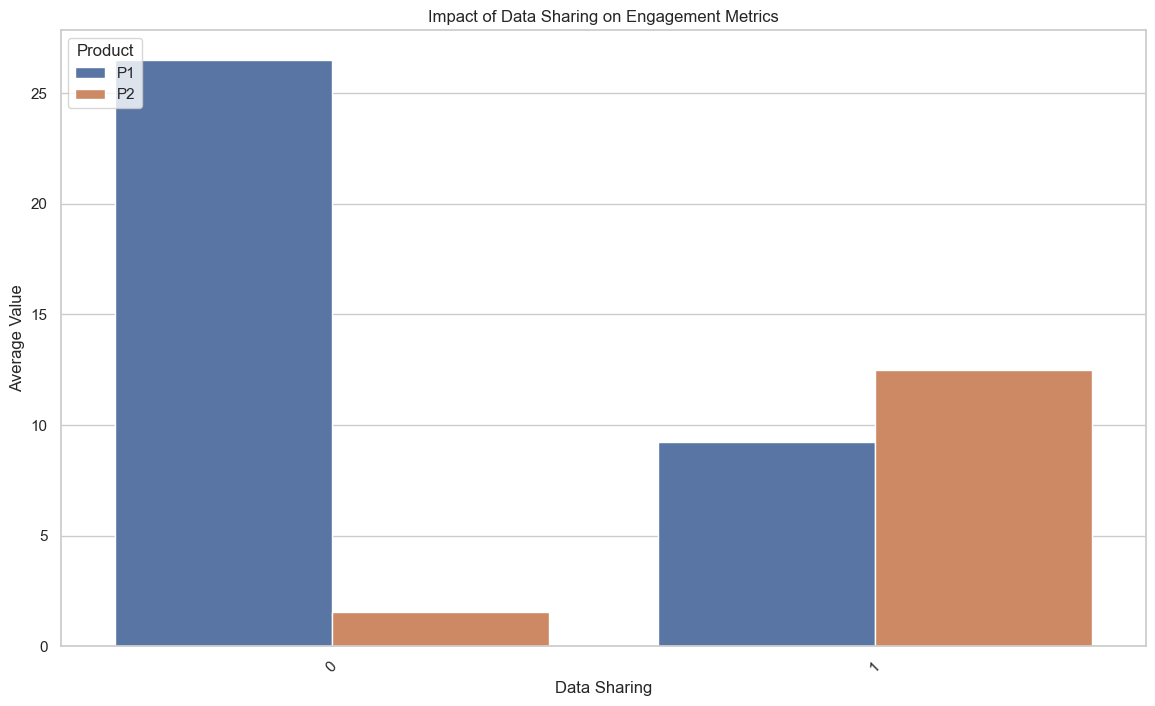

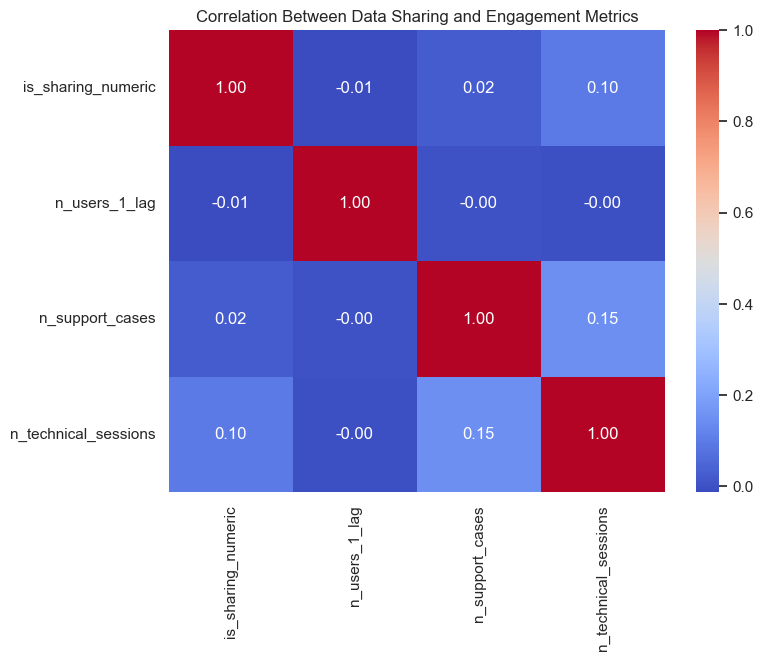

In [94]:
sharing_data = data[data['product'].isin(['P1', 'P2'])]
sharing_averages = sharing_data.groupby(['is_sharing', 'product']).agg(
    avg_users=('n_users_1_lag', 'mean'),
    avg_support_cases=('n_support_cases', 'mean'),
    avg_technical_sessions=('n_technical_sessions', 'mean')
).reset_index()

sharing_melted = sharing_averages.melt(
    id_vars=['is_sharing', 'product'],
    value_vars=['avg_users', 'avg_support_cases', 'avg_technical_sessions'],
    var_name='Metric',
    value_name='Average'
)

plt.figure(figsize=(14, 8))
sns.barplot(data=sharing_melted, x='is_sharing', y='Average', hue='product', ci=None)
plt.title('Impact of Data Sharing on Engagement Metrics')
plt.ylabel('Average Value')
plt.xlabel('Data Sharing')
plt.xticks(rotation=45)
plt.legend(title='Product', loc='upper left')
plt.show()

sharing_correlation_data = sharing_data.copy()
sharing_correlation_data['is_sharing_numeric'] = sharing_correlation_data['is_sharing'].astype(int)

correlation_sharing_metrics = sharing_correlation_data[['is_sharing_numeric', 'n_users_1_lag',
                                                       'n_support_cases', 'n_technical_sessions']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_sharing_metrics, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Data Sharing and Engagement Metrics')
plt.show()


In [ ]:
# Analysis of the target Column



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


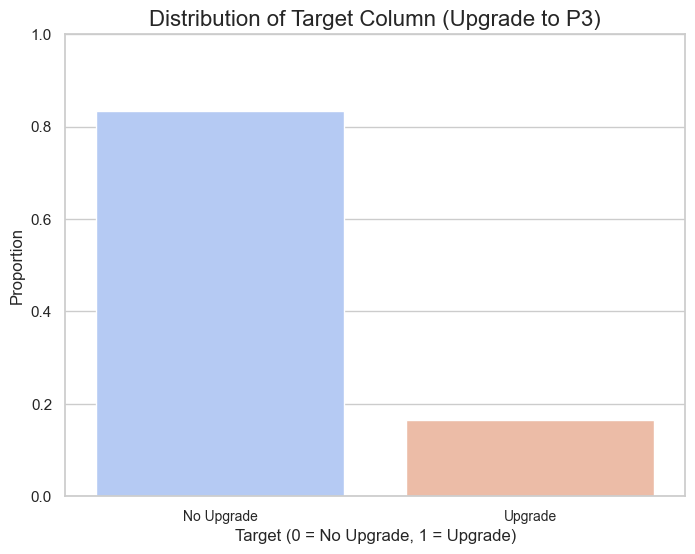

Target Distribution:
target
0    0.834406
1    0.165594
Name: proportion, dtype: Float64


In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the distribution of the target column
target_distribution = data['target'].value_counts(normalize=True)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='coolwarm')
plt.title("Distribution of Target Column (Upgrade to P3)", fontsize=16)
plt.xlabel("Target (0 = No Upgrade, 1 = Upgrade)", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks([0, 1], ['No Upgrade', 'Upgrade'], fontsize=10)
plt.ylim(0, 1)
plt.show()

print("Target Distribution:")
print(target_distribution)


In [ ]:
# Relationship Between target and Key Features

/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


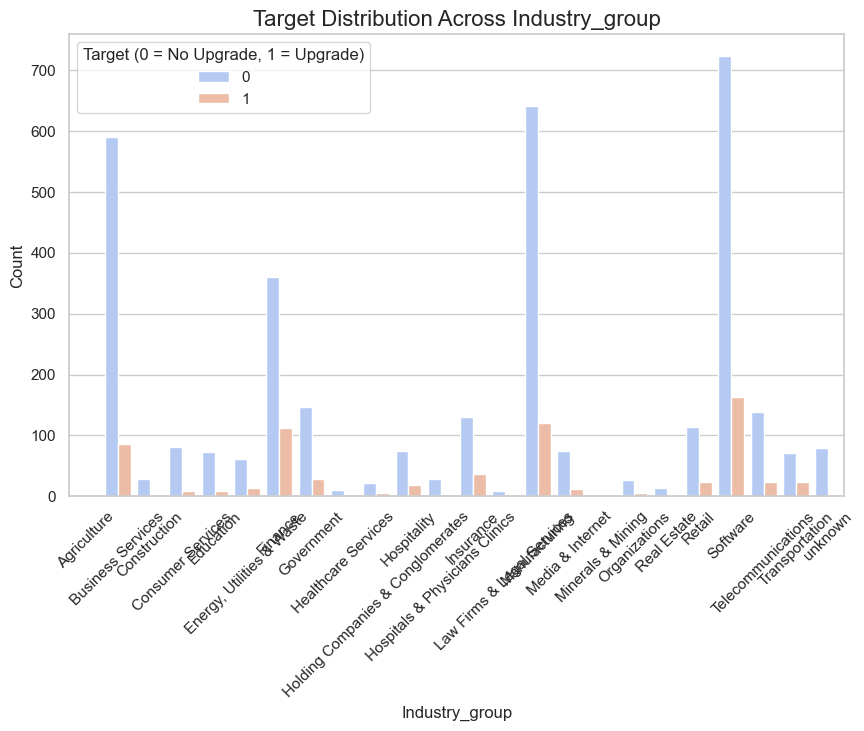

/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


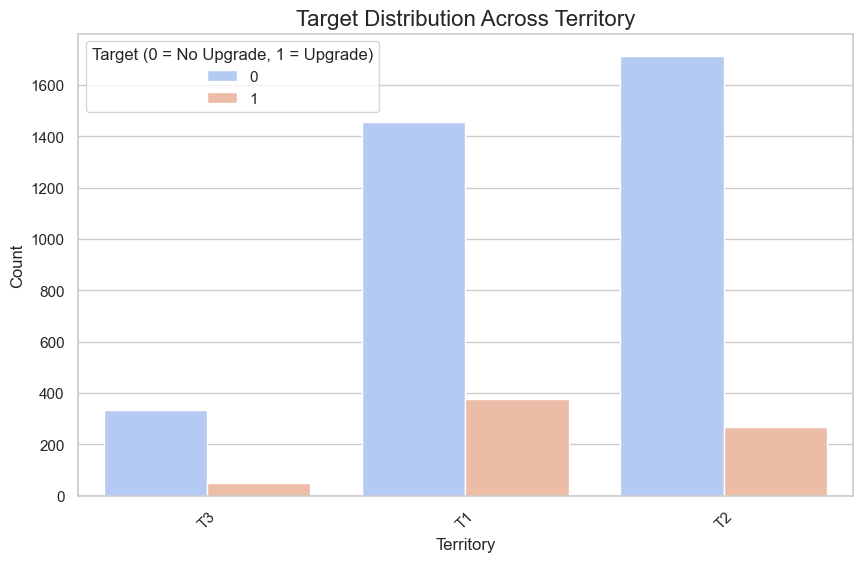

/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


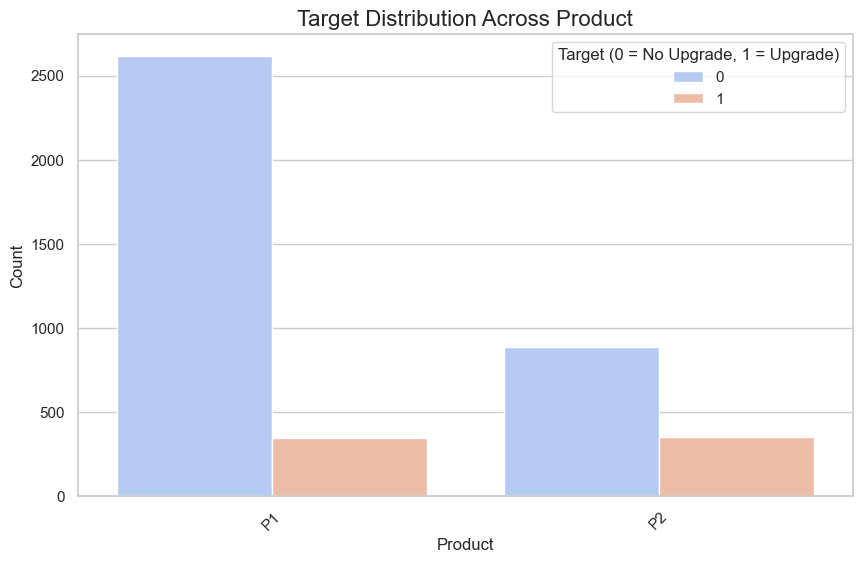

In [100]:
for col in ['industry_group', 'territory', 'product']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='target', data=data, palette='coolwarm')
    plt.title(f"Target Distribution Across {col.capitalize()}", fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Target (0 = No Upgrade, 1 = Upgrade)")
    plt.show()


In [ ]:
# Numerical Features:

<Figure size 1200x800 with 0 Axes>

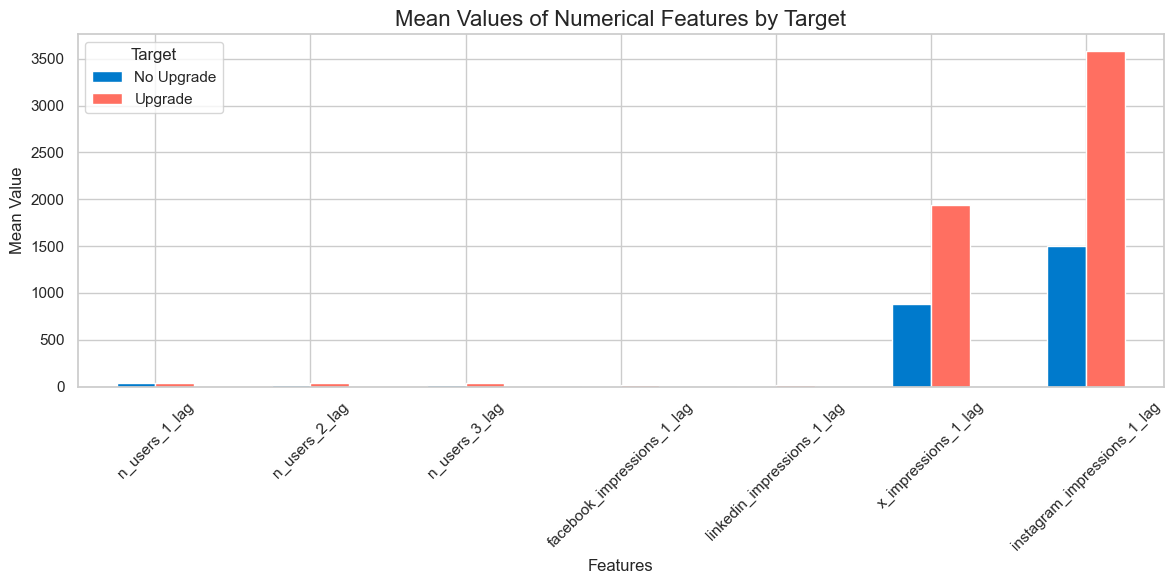

Mean Values by Target Group:
        n_users_1_lag  n_users_2_lag  n_users_3_lag  \
target                                                
0           36.707881      20.261279      19.137065   
1           39.145324      42.057554      42.479137   

        facebook_impressions_1_lag  linkedin_impressions_1_lag  \
target                                                           
0                         3.668761                    5.187036   
1                        19.423022                   12.693525   

        x_impressions_1_lag  instagram_impressions_1_lag  
target                                                    
0                 886.42233                  1504.164192  
1               1940.755396                  3581.060432  


In [101]:
numerical_cols = ['n_users_1_lag', 'n_users_2_lag', 'n_users_3_lag',
                  'facebook_impressions_1_lag', 'linkedin_impressions_1_lag',
                  'x_impressions_1_lag', 'instagram_impressions_1_lag']

numerical_means = data.groupby('target')[numerical_cols].mean()

plt.figure(figsize=(12, 8))
numerical_means.T.plot(kind='bar', figsize=(12, 6), color=['#007acc', '#ff6f61'])
plt.title("Mean Values of Numerical Features by Target", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["No Upgrade", "Upgrade"], title="Target")
plt.tight_layout()
plt.show()
print("Mean Values by Target Group:")
print(numerical_means)


In [ ]:
# Feature Correlation with target

/var/folders/9t/msh0s7lj6nl9lmxf_kw6jlkm0000gn/T/ipykernel_73926/551950434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.10/site-packag

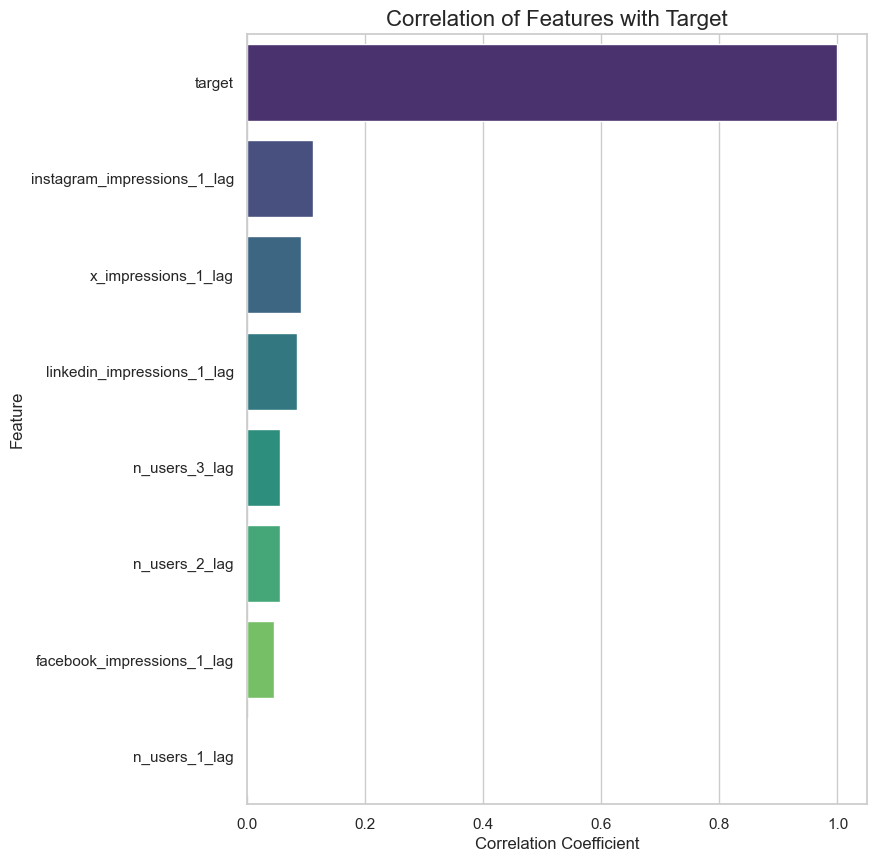

Correlations with Target:
target                         1.000000
instagram_impressions_1_lag    0.111091
x_impressions_1_lag            0.091970
linkedin_impressions_1_lag     0.084255
n_users_3_lag                  0.056644
n_users_2_lag                  0.055536
facebook_impressions_1_lag     0.046097
n_users_1_lag                  0.001008
Name: target, dtype: float64


In [102]:
correlations = data[numerical_cols + ['target']].corr()['target'].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title("Correlation of Features with Target", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()
print("Correlations with Target:")
print(correlations)


In [ ]:
# model

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


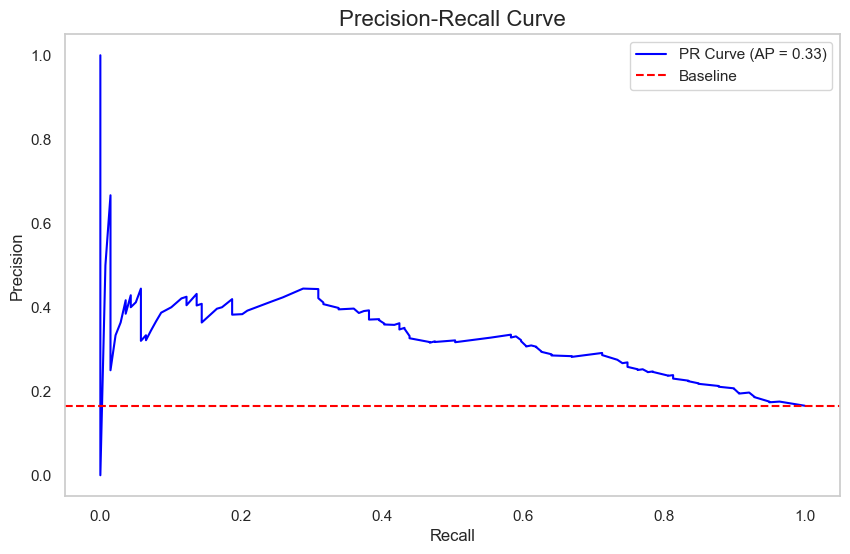

In [242]:
categorical_columns = ['industry_group', 'territory', 'product']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(data[categorical_columns])
categorical_encoded = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))

numerical_columns = ['n_users_1_lag', 'n_users_2_lag', 'n_users_3_lag',
                     'facebook_impressions_1_lag', 'linkedin_impressions_1_lag',
                     'x_impressions_1_lag', 'instagram_impressions_1_lag',
                     'n_support_cases', 'n_technical_sessions', 'n_contact_people']

X = pd.concat([data[numerical_columns], categorical_encoded], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='blue')
plt.axhline(y=sum(y_test) / len(y_test), color='red', linestyle='--', label='Baseline')
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [105]:
# metrics

In [243]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
f1 = f1_score(y_test, y_pred)

def calculate_lift(y_true, y_probs, top_percent=0.2):
    data = pd.DataFrame({'y_true': y_true, 'y_probs': y_probs})
    data = data.sort_values(by='y_probs', ascending=False)
    top_n = int(len(data) * top_percent)
    lift = data.iloc[:top_n]['y_true'].mean() / data['y_true'].mean()
    return lift

lift = calculate_lift(y_test, y_probs)

# Print Metrics
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Lift (Top 20%): {lift:.4f}")

Precision-Recall AUC: 0.3208
F1-Score: 0.1899
Lift (Top 20%): 2.1223
